## to do the analysis:
-	iloc warnings update to current version.
-	3d plots with bodyweight
- 	auc plots logy axis 


## Plots for manuscript
Which plots:
-   caffeine clearance / doses
-   caffeine half life / doses/kg
Different variants of plot
- only strict data & remove outliers & rest! (describe the criteria of data selection in legend, i.e. healthy, smoking, ...; and outlier removal!); for males oc=F must be inferred -> check and document;
- create rest/unknown category of all data which has missing smoking or oc information.
- all symbols are circles!, only change colors for subgroups: control, smoking, oc, oc-smoking, rest
- Two variants of plot: (i) only raw outputs and (ii) raw outputs + calculated (used different symbol for calculated)
- check errorbars for dose/kg 
- make plot square
- doses in [mg] and [mg/kg]; clearance in [ml/min]; thalf [hr];
- size of marker according to groupsize
- more concise legend,e.g., control (I=190, G=47, TI=2001)
- remove title, remove grid
- add histograms on y-Axis
- add interpolation curve for groups

- Create same plots with outliers + rest (supplement) & clearly mark the outliers and rest with different symbols;




## Manuscript: 

- update figure 3 second image (strict query) (make image legend and write method section ( how was the image created)
- add overview tables in suplements
- substance diagram on left side (add legend , add method section)


In [1]:
import pandas as pd
import numpy as np
from collections import namedtuple
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.lines import Line2D
import os
plt.style.use('seaborn-white')
import matplotlib
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker



from utils import PkdbModel, abs_idx,rel_idx,group_idx,individual_idx \

plt.rcParams.update({
        'axes.labelsize': '20',
        'axes.labelweight': 'bold',
        'axes.titlesize': 'medium',
        'axes.titleweight': 'bold',
        'legend.fontsize': '20',
        'xtick.labelsize': '20',
        'ytick.labelsize': '20',
        'figure.facecolor': '1.00'
    })


{'token': '9aab6e76a4bd5cb4b8bc58653b9434a3f5f00e3d'}


In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
caffeine_clr = PkdbModel("caffeine_clearance",destination="3-inferred")
caffeine_clr.read()
caffeine_clearance = caffeine_clr.data
caffeine_clearance["outlier"] = False


In [4]:
# filter out outliers probably from same clinical study 

In [5]:
caffeine_clearance.loc[caffeine_clearance["study"]== "Balogh1992","outlier"] = True
caffeine_clearance.loc[caffeine_clearance["study"]== "Harder1988","outlier"] = True
caffeine_clearance.loc[caffeine_clearance["study"]== "Harder1989","outlier"] = True

In [6]:

def control_idx(data):
    return ( data[ ('smoking', 'choice')] == 'N') \
           & (data.outlier == False) \
           & ((data[ ('oral contraceptives', 'choice')] == 'N') | ((data[('oral contraceptives', 'choice')].isnull()) & (data[('medication', 'choice')] == "N")))

def smoking_idx(data):
    return (data[ ('smoking', 'choice')] == 'Y') \
           & (data.outlier == False) \

def oc_idx(data):
    return (data.outlier == False) \
           & (data[ ('oral contraceptives', 'choice')] == 'Y') 

def outlier_idx(data):
    return  data.outlier == True

def rest_idx(data):
    return (~outlier_idx(data) & ~smoking_idx(data)  & ~oc_idx(data) & ~control_idx(data))

In [7]:
class FigureTemplate(object):
    def __init__(self,data_idx,intervention_type, output_type):
        self.data_idx = data_idx,
        self.intervention_type = intervention_type
        self.output_type = output_type
        self.figure=False,
        self.ax = False
    
    def data_subset(self,data):
        return data.loc[self.data_idx]
    
    def create_figure(self, data):
        if len(self.data_subset(data)) > 0:
             self.figure, self.ax  =  plt.subplots(nrows=1, ncols=1, figsize=(15, 15))


In [8]:
PlotCategory =  namedtuple('PlotCategory', ['name','color', 'marker','data_idx'])

def control_idx_strict(data):
    return ( data[ ('smoking', 'choice')] == 'N') \
           & (data.outlier == False) \
           & (data[ ('oral contraceptives', 'choice')] == 'N')
def smoking_idx_strict(data):
    return (data[ ('smoking', 'choice')] == 'Y') \
         & (data[ ('oral contraceptives', 'choice')] == 'N') \
           & (data.outlier == False) 

def oc_idx_strict(data):
    return (data.outlier == False) \
           & (data[ ('oral contraceptives', 'choice')] == 'Y') \
            & (data[ ('smoking', 'choice')] == 'N') 

def oc_smoking_strict(data):
    return (data.outlier == False) \
           & (data[ ('oral contraceptives', 'choice')] == 'Y') \
            & (data[ ('smoking', 'choice')] == 'Y') 

def rest_idx_strict(data):
        return (~control_idx_strict(data) & ~smoking_idx_strict(data) & ~oc_smoking_strict(data)  & ~oc_idx_strict(data) & ~outlier_idx(data))



In [9]:
colors = sns.color_palette("colorblind",n_colors=5)

In [10]:
categories_soft = [              
              PlotCategory(name="UNKOWN", color="darkgray", marker='o', data_idx=rest_idx),
              PlotCategory(name="CONTROL", color=colors[2], marker='o', data_idx=control_idx),
              PlotCategory(name="SMOKING", color=colors[0], marker='o', data_idx=smoking_idx),
              PlotCategory(name="OC", color=colors[3], marker='o', data_idx=oc_idx),
              #PlotCategory(name="outlier", color='red', marker='x', data_idx=outlier_idx),
             ]

In [11]:
categories_strict = [
              PlotCategory(name="UNKOWN", color="darkgray", marker='o', data_idx=rest_idx_strict),
              PlotCategory(name="CONTROL", color=colors[2], marker='o', data_idx=control_idx_strict),
              PlotCategory(name="SMOKING", color=colors[0], marker='o', data_idx=smoking_idx_strict),
              PlotCategory(name="OC", color=colors[3], marker='o', data_idx=oc_idx_strict),
              PlotCategory(name="OC-SMOKING", color=colors[1], marker='o', data_idx=oc_smoking_strict),
              #PlotCategory(name="outlier", color='red', marker='x', data_idx=outlier_idx),
             ]

In [12]:


def create_figures(df_data):
    figure_templates = [FigureTemplate(
        data_idx= abs_idx(df_data,"unit_intervention") & abs_idx(df_data,"unit"),
        intervention_type = "abs",
        output_type = "abs"
                  ),
    FigureTemplate(
        data_idx= rel_idx(df_data,"unit_intervention") & abs_idx(df_data,"unit"),
        intervention_type = "rel",
        output_type = "abs"
                  ),
    FigureTemplate(
        data_idx= abs_idx(df_data,"unit_intervention") & rel_idx(df_data,"unit"),
        intervention_type = "abs",
        output_type = "rel"
                  ),
    FigureTemplate(
        data_idx= rel_idx(df_data,"unit_intervention") & rel_idx(df_data,"unit"),
        intervention_type = "rel",
        output_type = "rel"
                  )
    ]
    
    for figure_template in figure_templates:
        
        figure_template.create_figure(df_data)
    return figure_templates
        
    
    


In [48]:

import matplotlib.font_manager as font_manager
font = font_manager.FontProperties(family='Roboto Mono',
                                   weight='normal',
                                   style='normal', size=16,) 

category_mapper = {
    "thalf": "half time"
}

def create_plots(df_data,categories,fig_path,pktype, log_y=False):
    
    
    figures = create_figures(df_data)
    
    for figure in figures:
        if figure.ax:
            df_figure = figure.data_subset(df_data)
            
            df_figure_max = max([df_figure["value"].max(),df_figure["mean"].max()])*1.05
            df_figure_x_max =df_figure["value_intervention"].max()*1.05
            
            df_figure_min = min([df_figure["value"].min(),df_figure["mean"].min()])/1.05

        
            df_individual = df_figure[individual_idx(df_data)]
            df_group = df_figure[group_idx(df_data)]

            legend_elements = []
            for plot_category in categories:
                
                
                
                
                df_category = df_individual[plot_category.data_idx(df_individual)]
                
                units = df_category["unit"].unique()
                units_intervention = df_category["unit_intervention"].unique()
                assert len(units) <= 1, units
                try:
                    unit = units[0]
                    unit_intervention = units_intervention[0]
                    
                    y_axis = category_mapper
                    
                    y_axis_label = category_mapper.get(pktype,pktype)

                    figure.ax.set_ylabel(f'{y_axis_label} [{unit}]')
                    figure.ax.set_xlabel(f'dose [{unit_intervention}]')
                    figure.ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

                except IndexError: 
                    pass
                
                
                individuals_number = len(df_category)
                
                for (calculated,inferred), df_individuals in df_category.groupby(["calculated","inferred"]):
                    if inferred:
                        marker ="v"
                    elif calculated:
                        marker = "s"
                    else:
                        marker = plot_category.marker
                        
                    

                    x = df_individuals["value_intervention"]
                    y = df_individuals["value"]
                    figure.ax.scatter(x, y,color=plot_category.color, marker=marker, alpha=0.7,label=None,  s=20)

                

                

                df_category = df_group[plot_category.data_idx(df_group)]
                df_category = df_category[df_category["mean"].notnull()]
                group_number = len(df_category)
                total_group_individuals = 0
                x_group_max = df_category["value_intervention"].max()
                y_group_max = df_category["mean"].max()

                for i, df_row in df_category.iterrows():
                    if df_row["inferred"]:
                        marker = "v"
                        
                    elif df_row["calculated"]:
                        marker = "s"
                    else:
                        marker = plot_category.marker

                    x_group = df_row["value_intervention"]
                    y_group = df_row["mean"]

                    if figure.output_type == "rel":
                        xerr_group = (df_row[("weight","sd")]/df_row[("weight","mean")])*x_group
                    else:
                        xerr_group = 0
                    yerr_group = df_row["se"]
                    group_count = df_row['group_count']
                    total_group_individuals += group_count
                    
                

                    figure.ax.errorbar(x_group, y_group,yerr=yerr_group,xerr=xerr_group, color=plot_category.color, fmt=marker,ms=group_count+5, alpha=0.7)
                    #for i, txt in enumerate(df_category[('study', '')]):
                    txt = df_row[('study', '')]
                    figure.ax.annotate(txt, (x_group+(0.01*x_group_max),
                                      y_group+(0.01*y_group_max)), alpha=0.7)
                    
                label_text = f"{plot_category.name:<10} I: {individuals_number:<3} G: {group_number:<2} TI: {int(total_group_individuals + individuals_number):<3}"
                print(label_text)
                # "
                label = Line2D([0], [0], marker='o', color='w', label=label_text, markerfacecolor=plot_category.color, markersize=10)
                legend_elements.append(label)
                
            legend2_elements = [
                Line2D([0], [0], marker='o', color='w', label="RAW",markerfacecolor="black", markersize=10),
                Line2D([0], [0], marker='s', color='w', label="CALCULATED",markerfacecolor="black", markersize=10),
                Line2D([0], [0], marker='s', color='w', label="INFERRED",markerfacecolor="black", markersize=10)

            ]
            
            legend3_elements = [
                Line2D([0], [10],marker='o', color='w', label="1",markerfacecolor="black", markersize=5+1),
                Line2D([0], [20], marker='o', color='w', label="10",markerfacecolor="black", markersize=5+10),
                Line2D([0], [50], marker='o', color='w', label="30",markerfacecolor="black", markersize=5+30),
]

            #figure.ax.set_title(pktype.capitalize())
            figure.ax.set_xlim(left=0, right=df_figure_x_max)
            #figure.ax.yaxis.set_major_locator(MaxNLocator(integer=True))
            figure.ax.yaxis.set_major_formatter(ticker.ScalarFormatter(useMathText=True))
            
            leg1 = figure.ax.legend(handles=legend_elements, prop=font)
            
            leg2 = figure.ax.legend(handles=legend2_elements, prop = font, loc ="upper left")
            leg3 = figure.ax.legend(handles=legend3_elements, prop=font,labelspacing=1.3 ,loc=("center right"))
            leg3.set_title(title="GROUP SIZE",prop=font )
            figure.ax.add_artist(leg2)
            figure.ax.add_artist(leg1)

            if log_y:
                figure.ax.set_yscale("log") 
                figure.ax.set_ylim(bottom=df_figure_min, top=df_figure_max)
            else:
                figure.ax.set_ylim(bottom=0, top=df_figure_max)



            figure.figure.savefig(os.path.join(fig_path,f"{pktype}_{figure.output_type}-vs-dosing_{figure.intervention_type}.svg"), bbox_inches="tight")



                

   

In [49]:
print(len(caffeine_clearance[caffeine_clearance["calculated"] == True]))
print(len(caffeine_clearance[caffeine_clearance["calculated"] == False]))

222
1737


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 29  G: 41 TI: 359
CONTROL    I: 204 G: 62 TI: 863
SMOKING    I: 85  G: 20 TI: 373
OC         I: 53  G: 6  TI: 105


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 14  G: 37 TI: 297
CONTROL    I: 112 G: 48 TI: 601
SMOKING    I: 68  G: 15 TI: 308
OC         I: 33  G: 4  TI: 65 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 53  G: 43 TI: 415
CONTROL    I: 189 G: 54 TI: 754
SMOKING    I: 80  G: 18 TI: 347
OC         I: 42  G: 4  TI: 74 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 18  G: 37 TI: 301
CONTROL    I: 118 G: 51 TI: 625
SMOKING    I: 75  G: 16 TI: 321
OC         I: 33  G: 4  TI: 65 


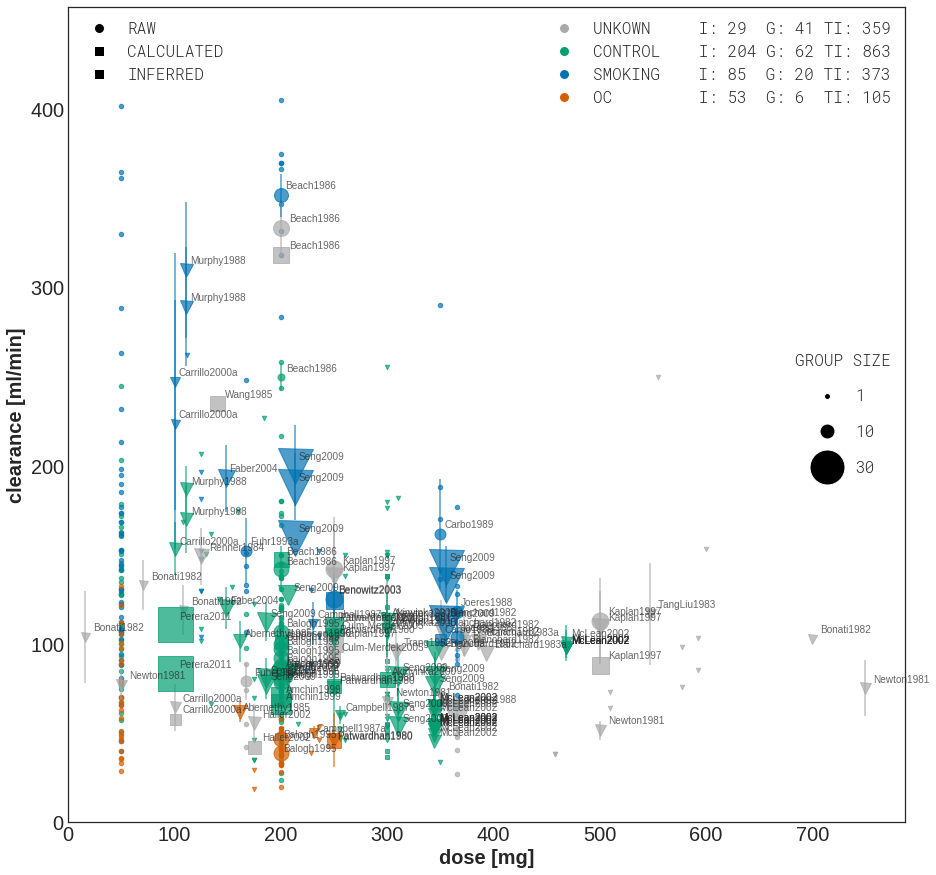

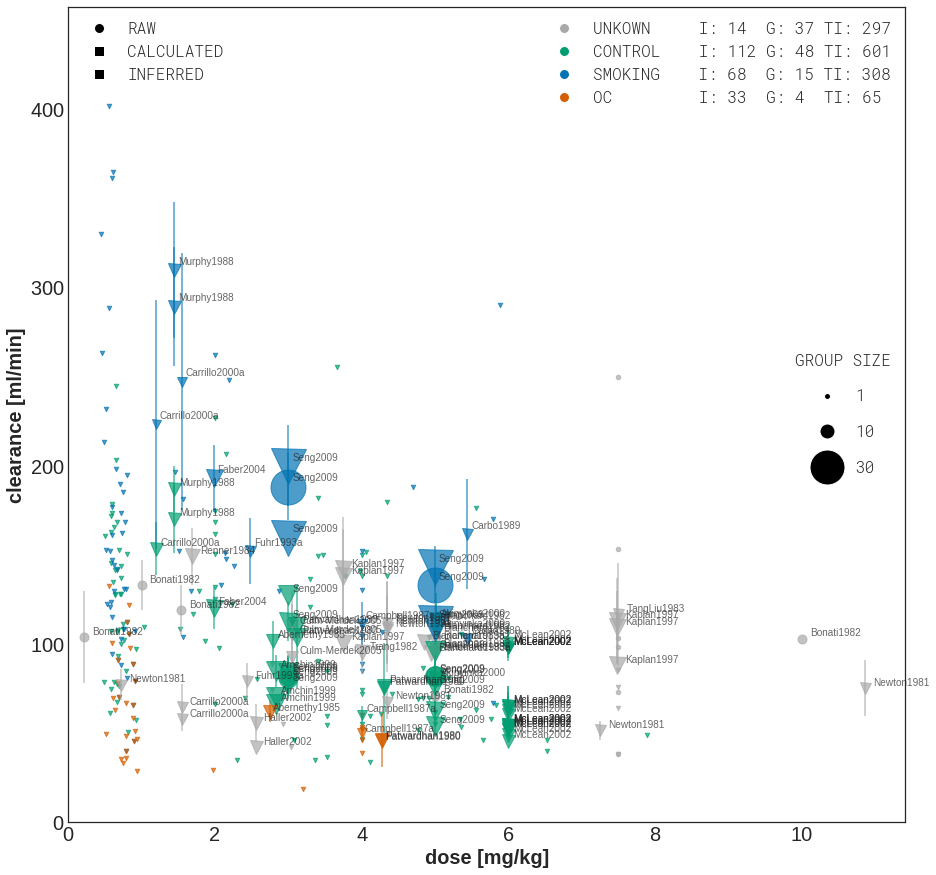

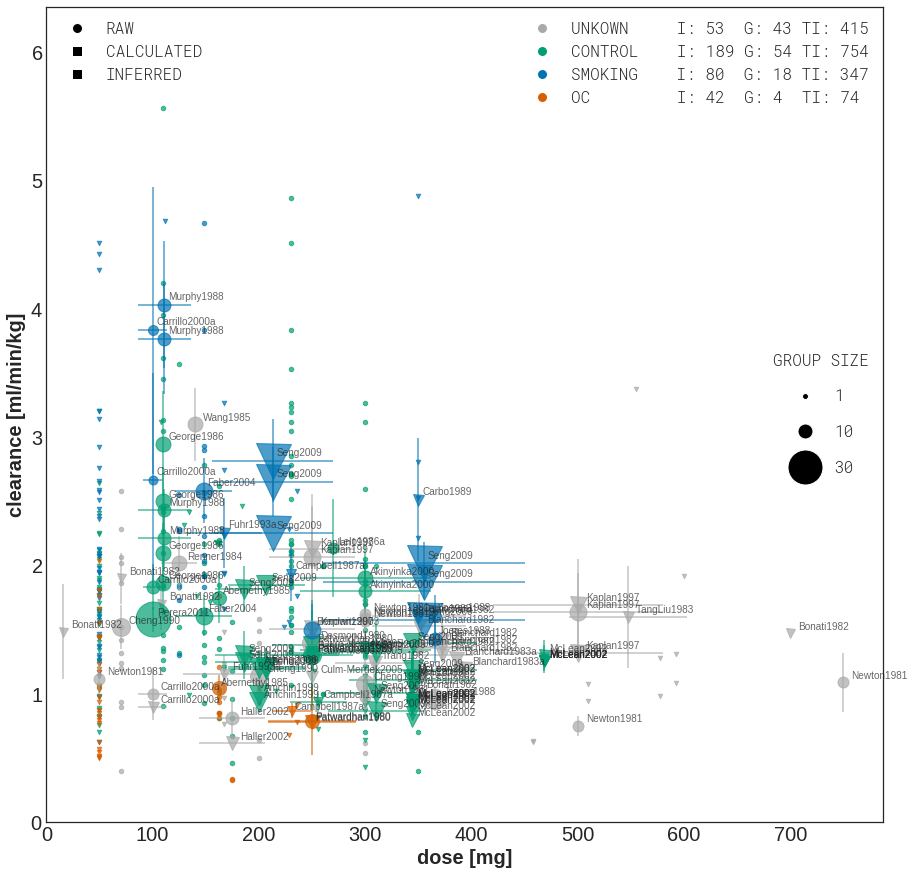

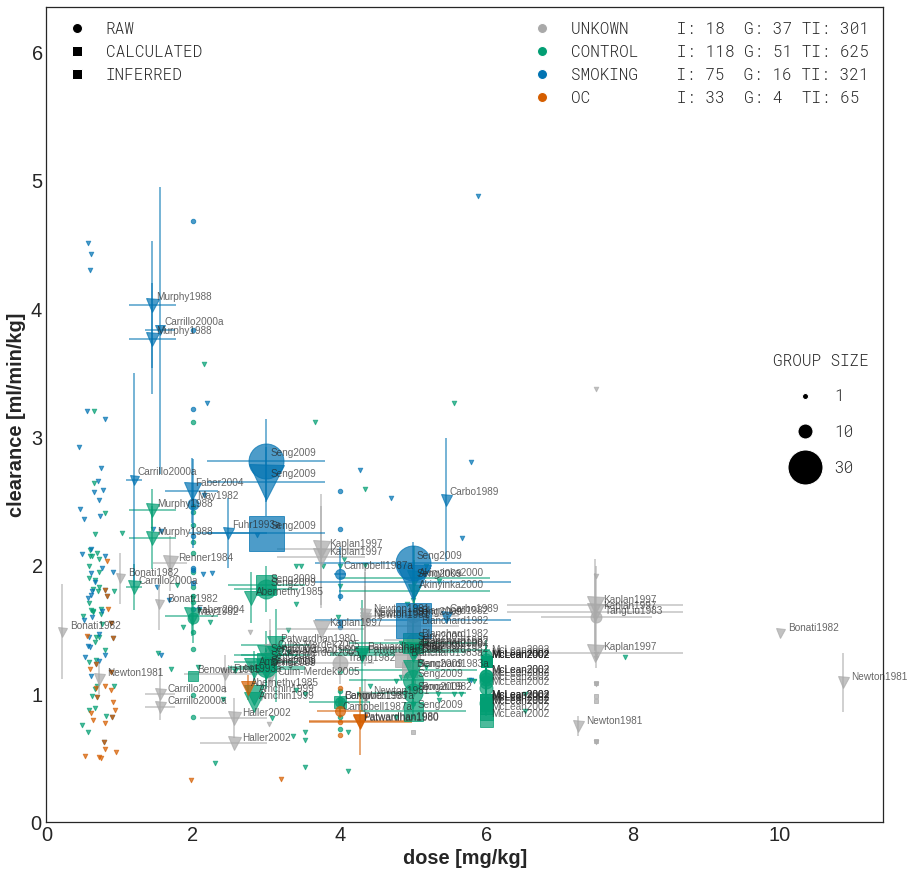

In [50]:
create_plots(caffeine_clearance,categories_soft,"reports/soft","clearance")

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 57  G: 52 TI: 472
CONTROL    I: 190 G: 56 TI: 803
SMOKING    I: 62  G: 15 TI: 311
OC         I: 44  G: 6  TI: 96 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 32  G: 45 TI: 381
CONTROL    I: 99  G: 43 TI: 544
SMOKING    I: 54  G: 12 TI: 272
OC         I: 24  G: 4  TI: 56 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 71  G: 52 TI: 507
CONTROL    I: 176 G: 49 TI: 697
SMOKING    I: 66  G: 14 TI: 303
OC         I: 33  G: 4  TI: 65 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 36  G: 45 TI: 385
CONTROL    I: 105 G: 46 TI: 568
SMOKING    I: 61  G: 13 TI: 285
OC         I: 24  G: 4  TI: 56 
OC-SMOKING I: 9   G: 0  TI: 9  


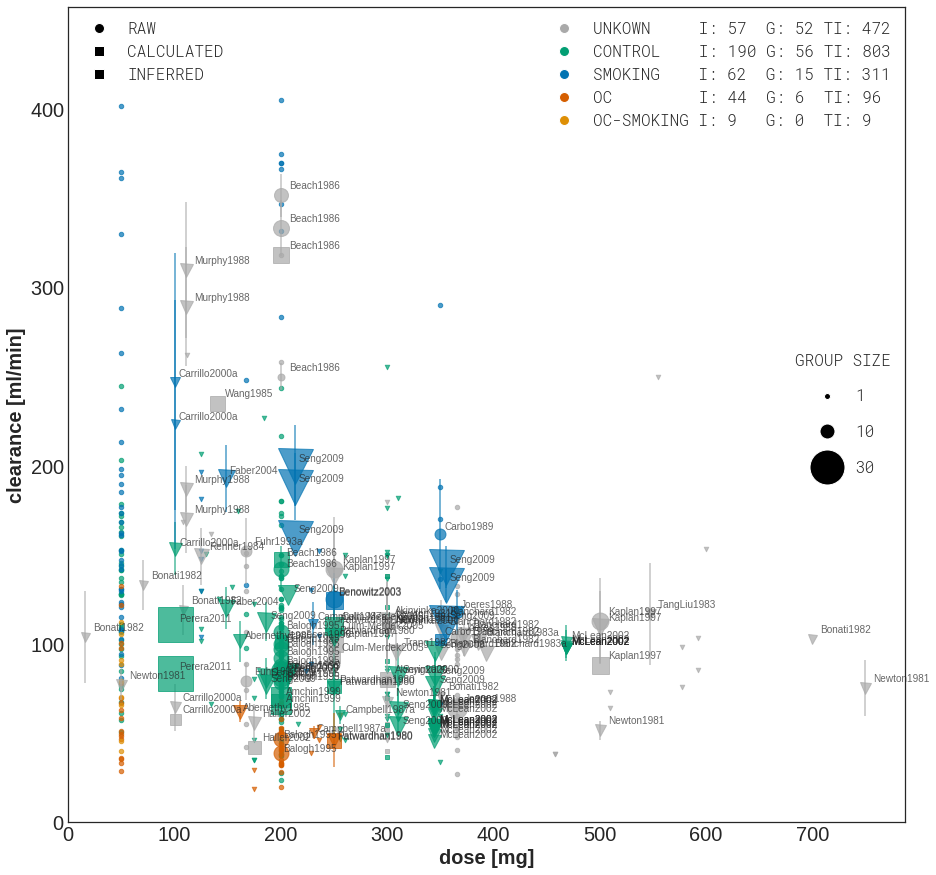

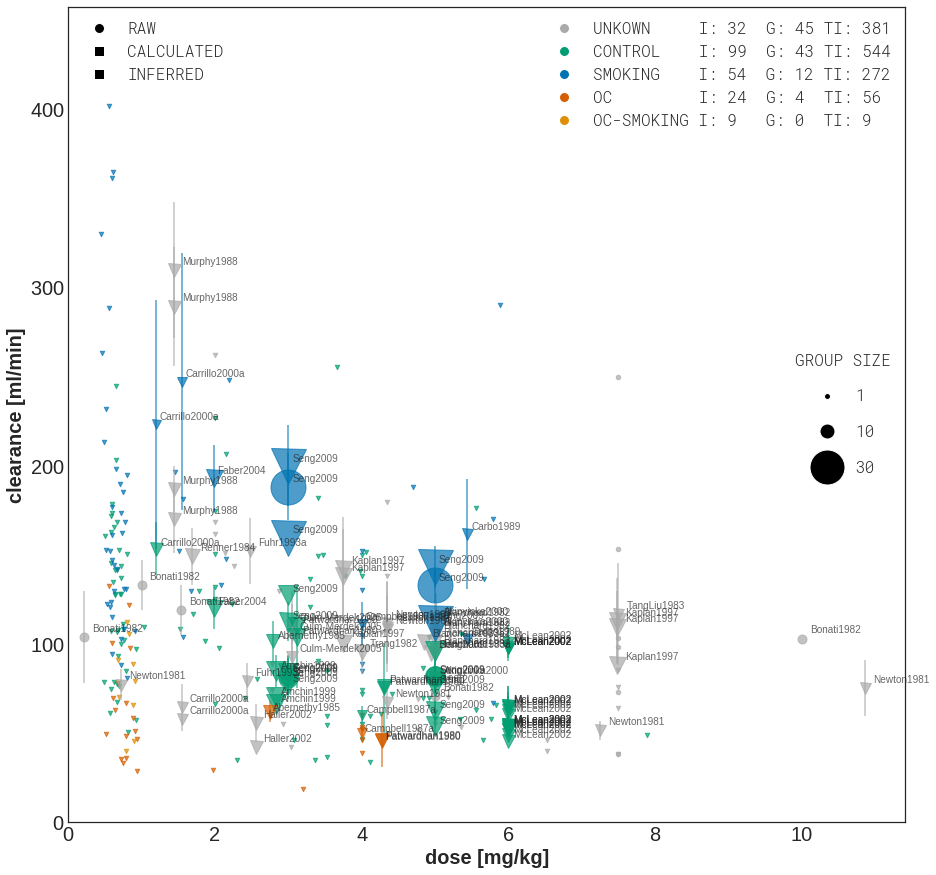

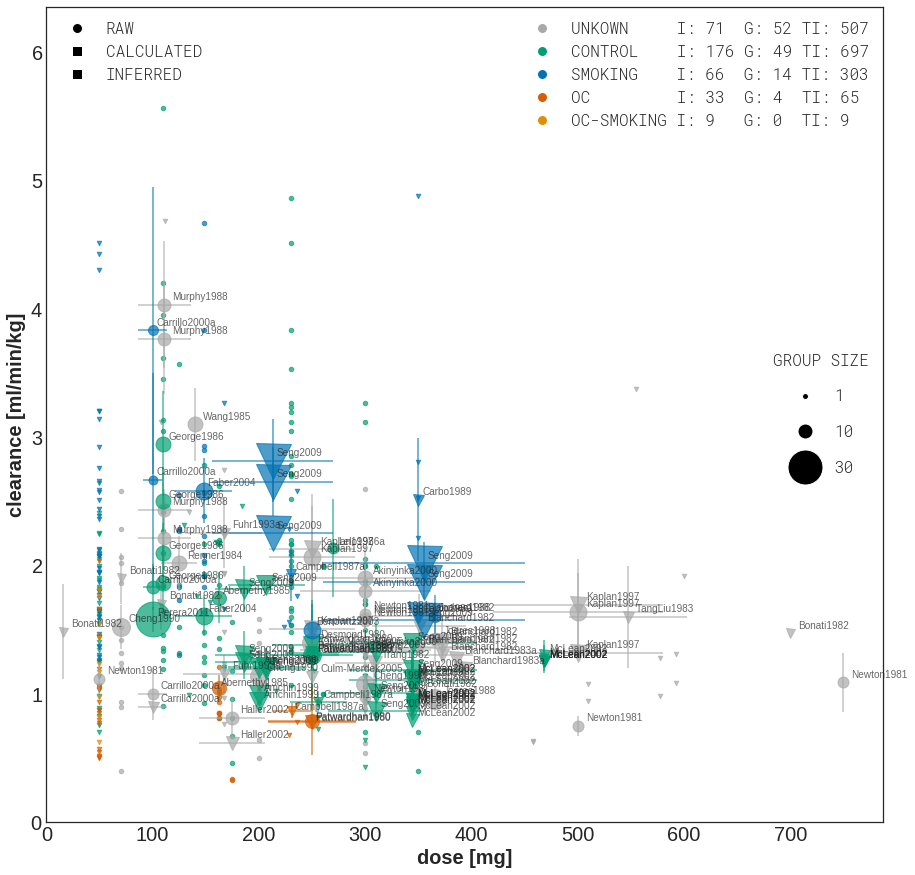

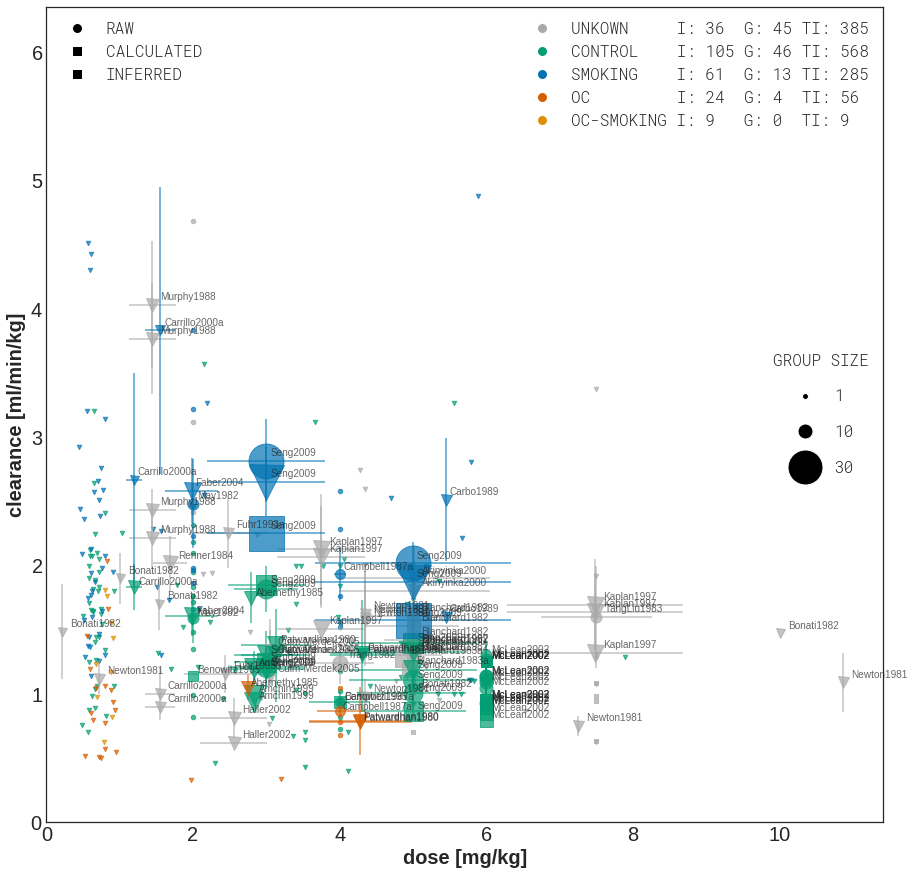

In [51]:
create_plots(caffeine_clearance,categories_strict,"reports/strict","clearance")

In [52]:
caffeine_clearance[abs_idx(caffeine_clearance,"unit_intervention") & abs_idx(caffeine_clearance,"unit")].groupby("subject_type").count()

study  output_type   pk  access  measurement_type  tissue  \
subject_type                                                              
group           140          140  140     140               140     140   
individual      434          434  434     434               434     434   

              allowed_users  substance  raw_pk  interventions  ...  \
subject_type                                                   ...   
group                   140        140     140            140  ...   
individual              434        434     434            434  ...   

              (lean body mass, count)  (lean body mass, mean)  \
subject_type                                                    
group                               0                       0   
individual                          0                       0   

              (lean body mass, sd)  (lean body mass, unit)  \
subject_type                                                 
group                            0                       0   
individual                       0                       0   

              (fat weight, count)  (fat weight, mean)  (fat weight, se)  \
subject_type                                                              
group                          20                  20                20   
individual                      0                   0                 0   

              (fat weight, unit)  inferred  outlier  
subject_type                                         
group                         20       140      140  
individual                     0       434      434  

[2 rows x 244 columns]

In [53]:
caffeine_thf = PkdbModel("caffeine_thalf",destination="3-inferred")
caffeine_thf.read()
caffeine_thalf = caffeine_thf.data
caffeine_thalf["outlier"] = False
caffeine_thalf.loc[caffeine_thalf["study"]== "Balogh1992","outlier"] = True
caffeine_thalf.loc[caffeine_thalf["study"]== "Harder1988","outlier"] = True
caffeine_thalf.loc[caffeine_thalf["study"]== "Harder1989","outlier"] = True

In [54]:
caffeine_thalf.groupby(["calculated","outlier"]).get_group((True,False))[["study","value_intervention","unit_intervention","unit","value","mean"]]

study  value_intervention unit_intervention   unit  value  \
1        Benowitz2003          250.000000                mg     hr    NaN   
19          Beach1986          200.000000                mg     hr    NaN   
21          Beach1986          200.000000                mg     hr    NaN   
34      Blanchard1982            5.000000             mg/kg     hr    NaN   
35      Blanchard1982            5.000000             mg/kg     hr    NaN   
37      Blanchard1982            5.000000             mg/kg     hr    NaN   
39      Blanchard1982            5.000000             mg/kg     hr    NaN   
40       Benowitz1995            2.000000             mg/kg     hr    NaN   
41       Benowitz1995            4.000000             mg/kg     hr    NaN   
42     Blanchard1983a            4.850000             mg/kg     hr    NaN   
43     Blanchard1983a            4.940000             mg/kg     hr    NaN   
76         Haller2002          175.000000                mg     hr    NaN   
81         McLean2002            6.000000             mg/kg     hr    NaN   
85         McLean2002            6.000000             mg/kg     hr    NaN   
87         McLean2002            6.000000             mg/kg     hr    NaN   
88         McLean2002            6.000000             mg/kg     hr    NaN   
89         McLean2002            6.000000             mg/kg     hr    NaN   
90         McLean2002            6.000000             mg/kg     hr    NaN   
91         McLean2002            6.000000             mg/kg     hr    NaN   
92         McLean2002            6.000000             mg/kg     hr    NaN   
93         McLean2002            6.000000             mg/kg     hr    NaN   
96         McLean2002            6.000000             mg/kg     hr    NaN   
97         McLean2002            6.000000             mg/kg     hr    NaN   
98         McLean2002            6.000000             mg/kg     hr    NaN   
107        Perera2011          100.000000                mg     hr    NaN   
109        Perera2011          100.000000                mg     hr    NaN   
114    Patwardhan1980          250.000000                mg     hr    NaN   
116    Patwardhan1980          250.000000                mg     hr    NaN   
118    Patwardhan1980          250.000000                mg     hr    NaN   
131     Carrillo2000a          100.000000                mg     hr    NaN   
...               ...                 ...               ...    ...    ...   
1666       Amchin1999            2.836879             mg/kg  hr/kg    NaN   
1667       Amchin1999            2.836879             mg/kg  hr/kg    NaN   
1670        Carbo1989            5.443235             mg/kg  hr/kg    NaN   
1672  Culm-Merdek2005            3.048780             mg/kg  hr/kg    NaN   
1674       Kaplan1997            3.742515             mg/kg  hr/kg    NaN   
1675       Kaplan1997            7.485030             mg/kg  hr/kg    NaN   
1682    Blanchard1982          372.000000                mg  hr/kg    NaN   
1683    Blanchard1982          372.000000                mg  hr/kg    NaN   
1685    Blanchard1982          351.000000                mg  hr/kg    NaN   
1687    Blanchard1982          351.000000                mg  hr/kg    NaN   
1688   Blanchard1983a          385.575000                mg  hr/kg    NaN   
1689   Blanchard1983a          392.730000                mg  hr/kg    NaN   
1692       McLean2002          344.400000                mg  hr/kg    NaN   
1696       McLean2002          344.400000                mg  hr/kg    NaN   
1698       McLean2002          344.400000                mg  hr/kg    NaN   
1699       McLean2002          344.400000                mg  hr/kg    NaN   
1700       McLean2002          344.400000                mg  hr/kg    NaN   
1701       McLean2002          344.400000                mg  hr/kg    NaN   
1702       McLean2002          344.400000                mg  hr/kg    NaN   
1703       McLean2002          344.400000                mg  hr/kg    NaN   
1704       M

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 34  G: 52 TI: 470
CONTROL    I: 175 G: 59 TI: 820
SMOKING    I: 62  G: 12 TI: 239
OC         I: 33  G: 6  TI: 85 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 36  G: 41 TI: 352
CONTROL    I: 105 G: 43 TI: 524
SMOKING    I: 61  G: 10 TI: 213
OC         I: 24  G: 4  TI: 56 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 32  G: 41 TI: 348
CONTROL    I: 99  G: 40 TI: 500
SMOKING    I: 54  G: 9  TI: 200
OC         I: 24  G: 4  TI: 56 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 32  G: 41 TI: 348
CONTROL    I: 99  G: 40 TI: 500
SMOKING    I: 54  G: 9  TI: 200
OC         I: 24  G: 4  TI: 56 
OC-SMOKING I: 9   G: 0  TI: 9  


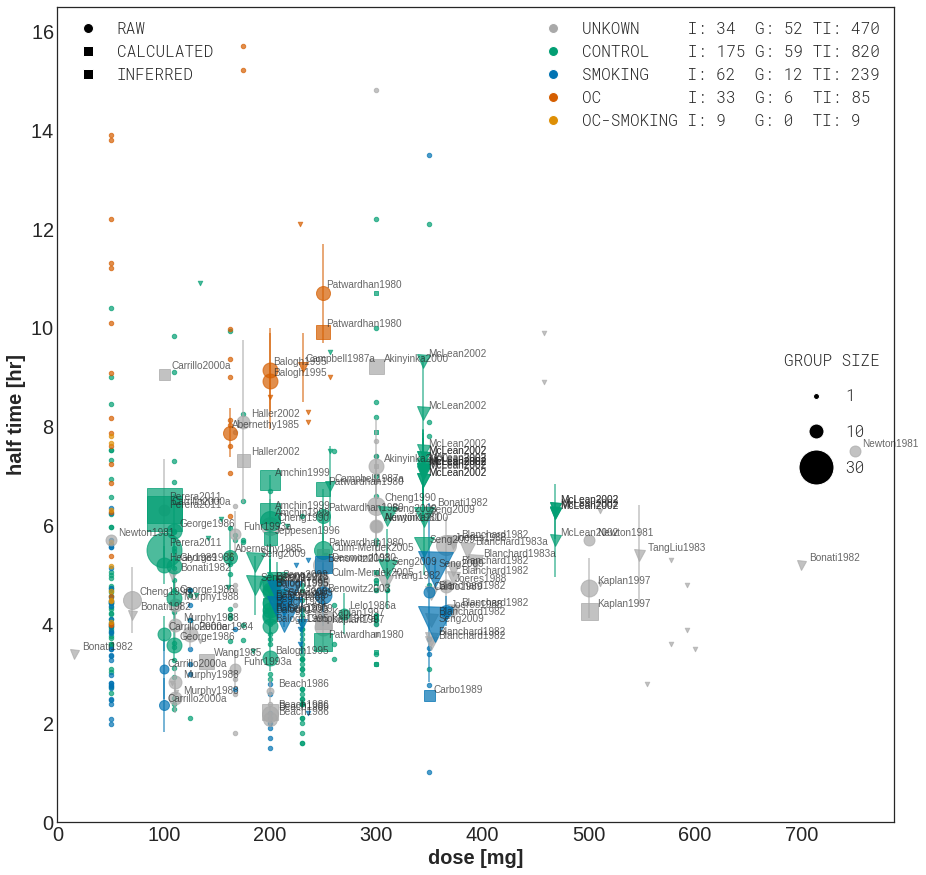

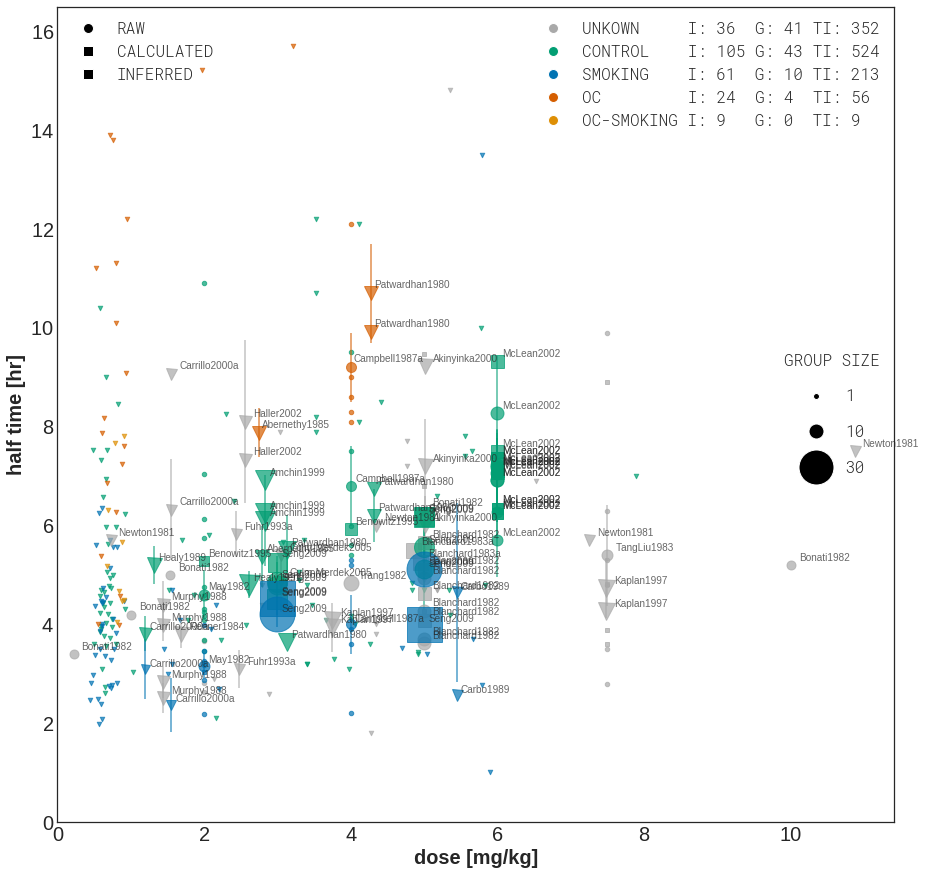

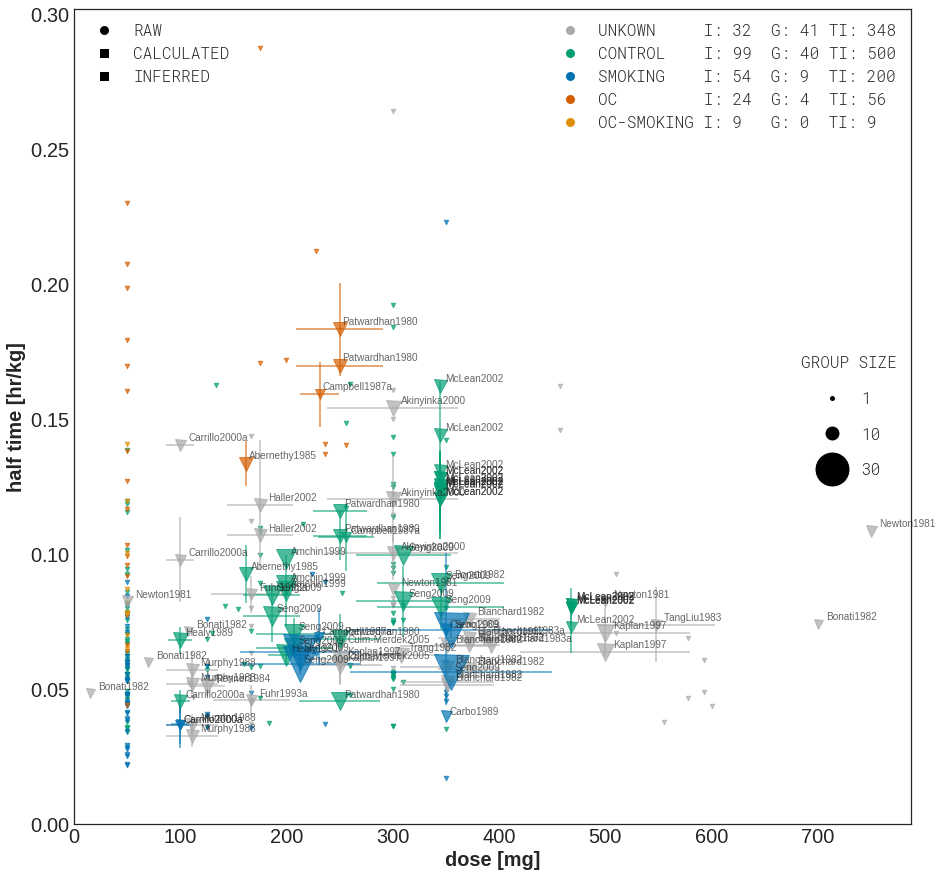

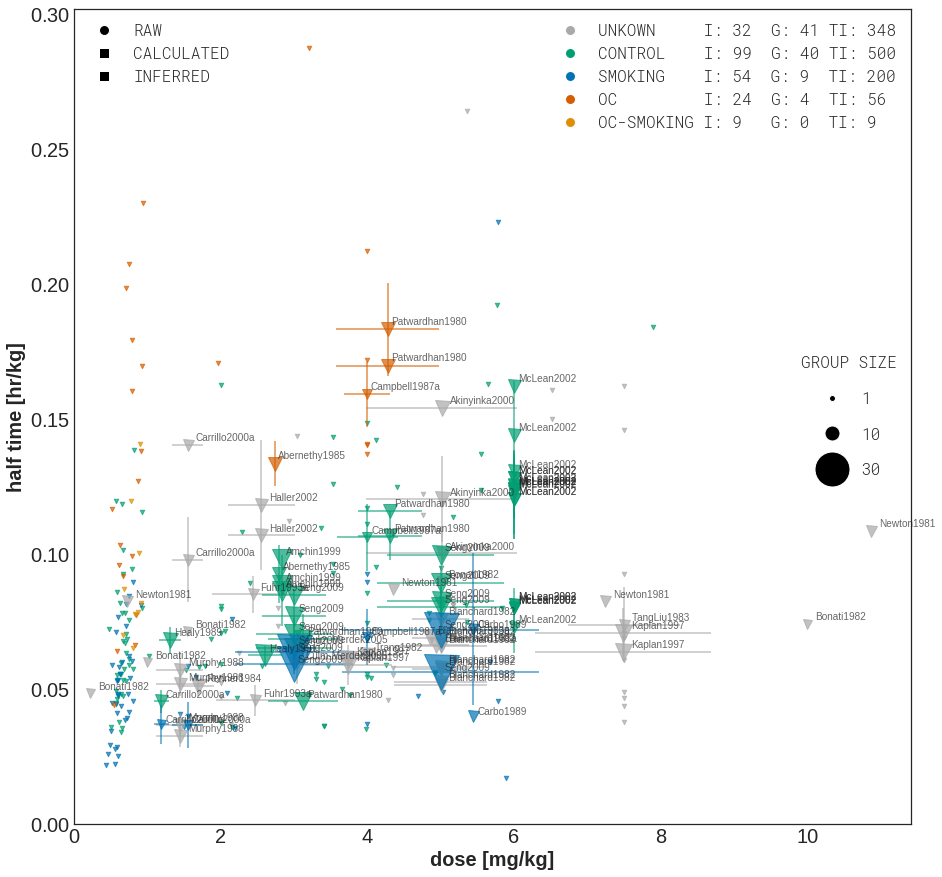

In [55]:
create_plots(caffeine_thalf,categories_strict,"reports/strict","thalf")

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 14  G: 41 TI: 365
CONTROL    I: 189 G: 65 TI: 880
SMOKING    I: 77  G: 17 TI: 293
OC         I: 42  G: 6  TI: 94 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 18  G: 33 TI: 268
CONTROL    I: 118 G: 48 TI: 581
SMOKING    I: 75  G: 13 TI: 249
OC         I: 33  G: 4  TI: 65 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 14  G: 33 TI: 264
CONTROL    I: 112 G: 45 TI: 557
SMOKING    I: 68  G: 12 TI: 236
OC         I: 33  G: 4  TI: 65 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 14  G: 33 TI: 264
CONTROL    I: 112 G: 45 TI: 557
SMOKING    I: 68  G: 12 TI: 236
OC         I: 33  G: 4  TI: 65 


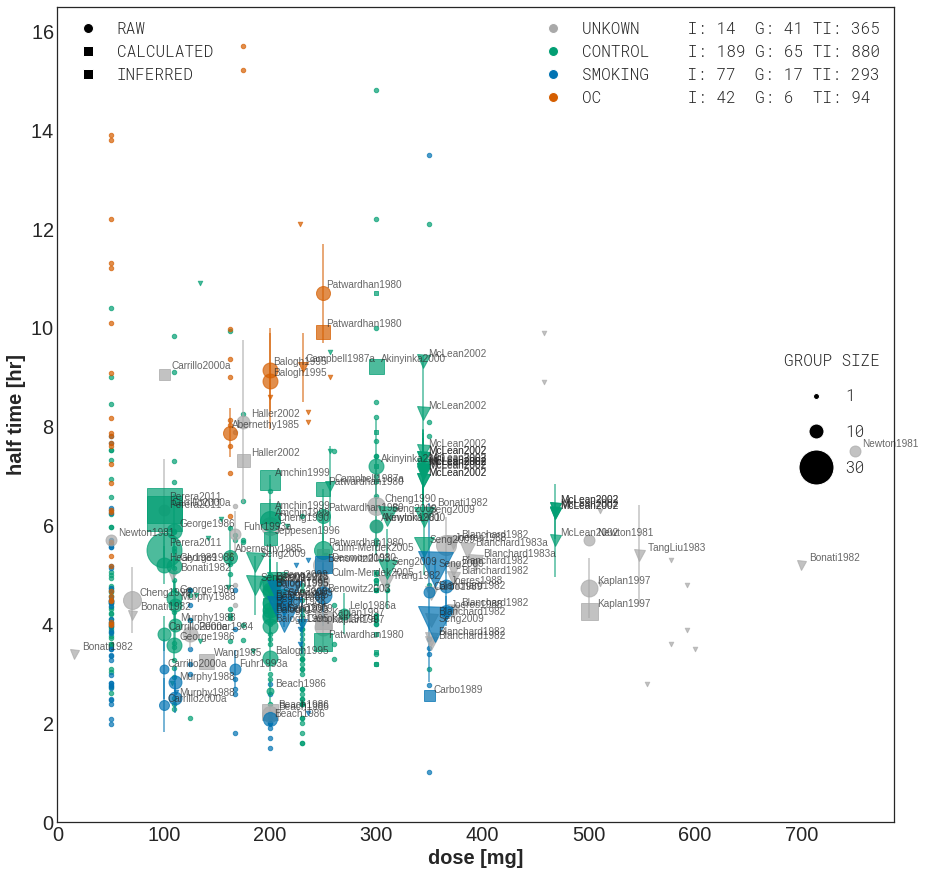

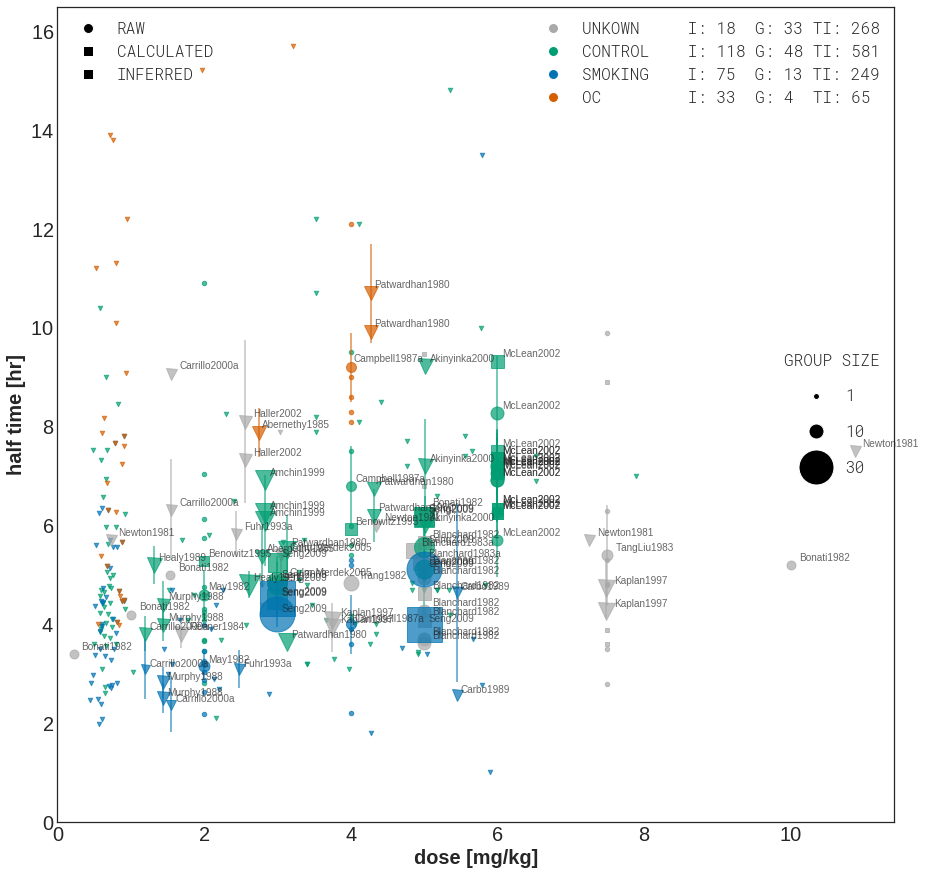

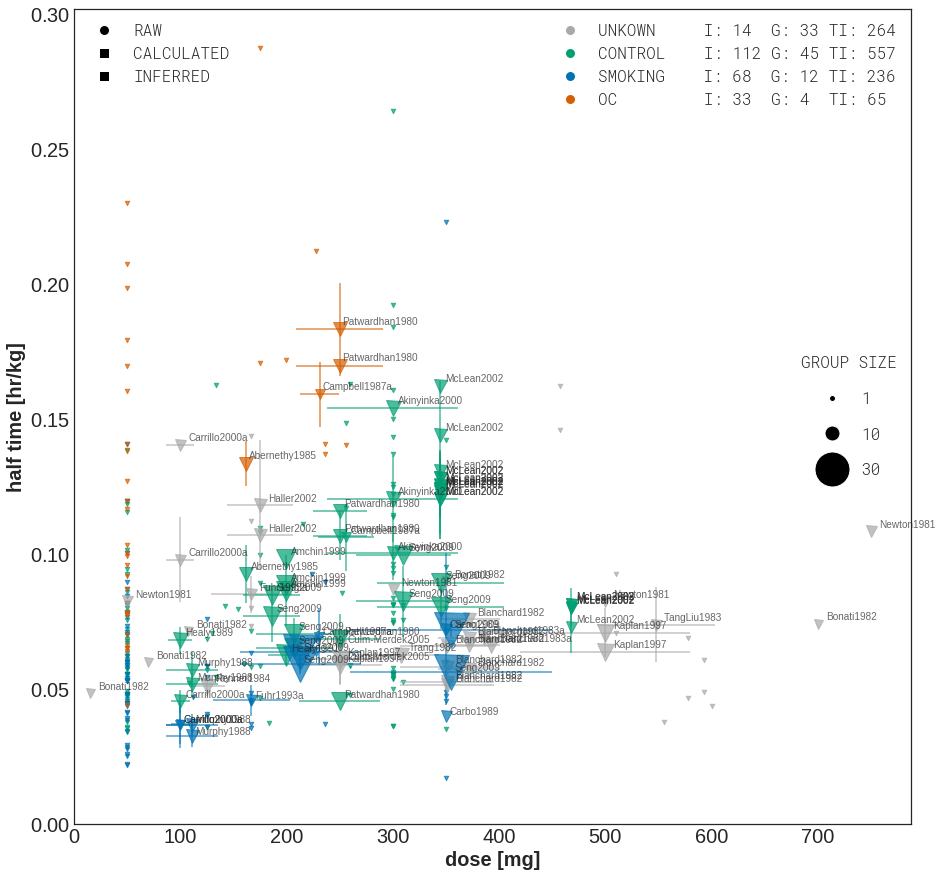

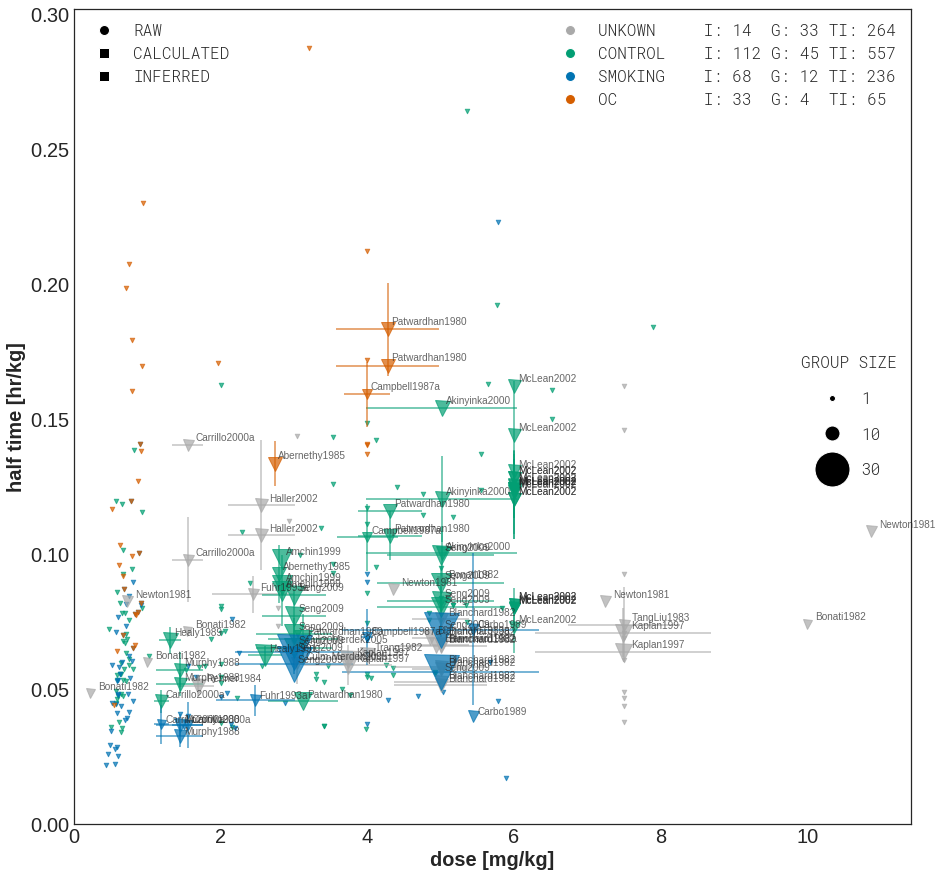

In [56]:
create_plots(caffeine_thalf,categories_soft,"reports/soft","thalf")

In [57]:
caffeine_mx = PkdbModel("caffeine_tmax",destination="3-inferred")
caffeine_mx.read()
caffeine_max = caffeine_mx.data
caffeine_max["outlier"] = False
caffeine_max.loc[caffeine_max["study"]== "Balogh1992","outlier"] = True
caffeine_max.loc[caffeine_max["study"]== "Harder1988","outlier"] = True
caffeine_max.loc[caffeine_max["study"]== "Harder1989","outlier"] = True


In [58]:
caffeine_max.groupby(["unit","unit_intervention"]).apply(len)

unit             unit_intervention
hour             gram                 261
                 gram / kilogram      199
hour / kilogram  gram                 178
                 gram / kilogram      178
dtype: int64

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 11  G: 27 TI: 250
CONTROL    I: 62  G: 50 TI: 630
SMOKING    I: 14  G: 10 TI: 128
OC         I: 2   G: 4  TI: 40 
OC-SMOKING I: 0   G: 0  TI: 0  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 13  G: 22 TI: 209
CONTROL    I: 19  G: 38 TI: 377
SMOKING    I: 13  G: 9  TI: 109
OC         I: 2   G: 2  TI: 20 
OC-SMOKING I: 0   G: 0  TI: 0  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 9   G: 22 TI: 205
CONTROL    I: 13  G: 35 TI: 353
SMOKING    I: 6   G: 8  TI: 96 
OC         I: 2   G: 2  TI: 20 
OC-SMOKING I: 0   G: 0  TI: 0  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 9   G: 22 TI: 205
CONTROL    I: 13  G: 35 TI: 353
SMOKING    I: 6   G: 8  TI: 96 
OC         I: 2   G: 2  TI: 20 
OC-SMOKING I: 0   G: 0  TI: 0  


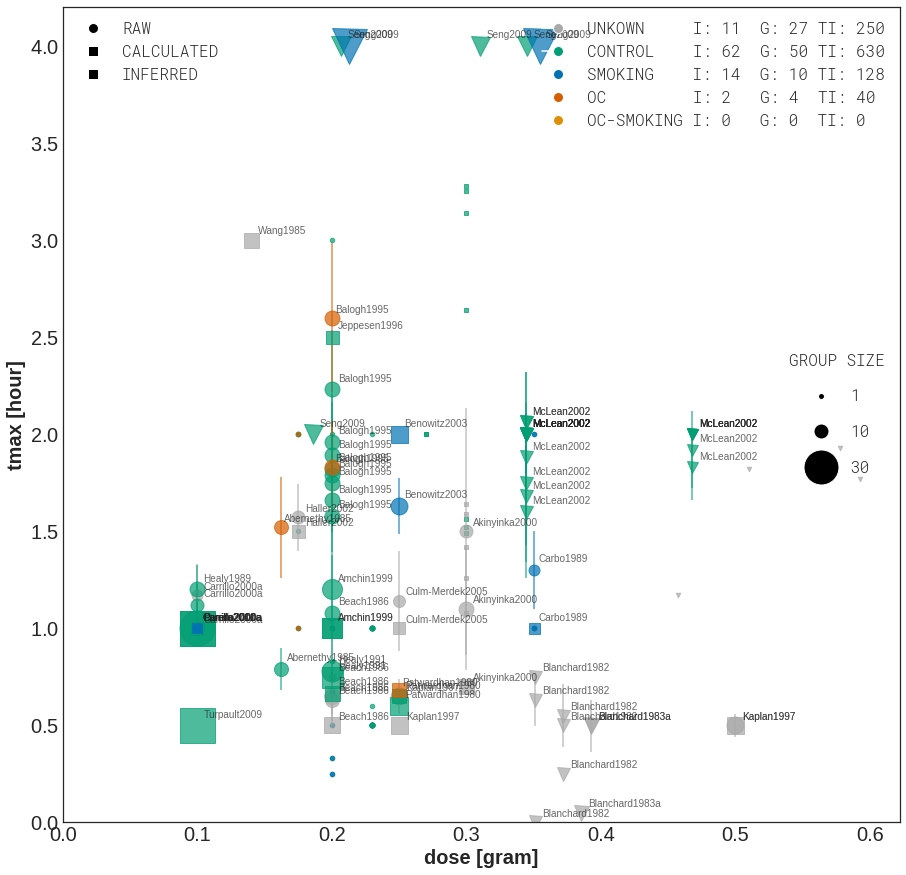

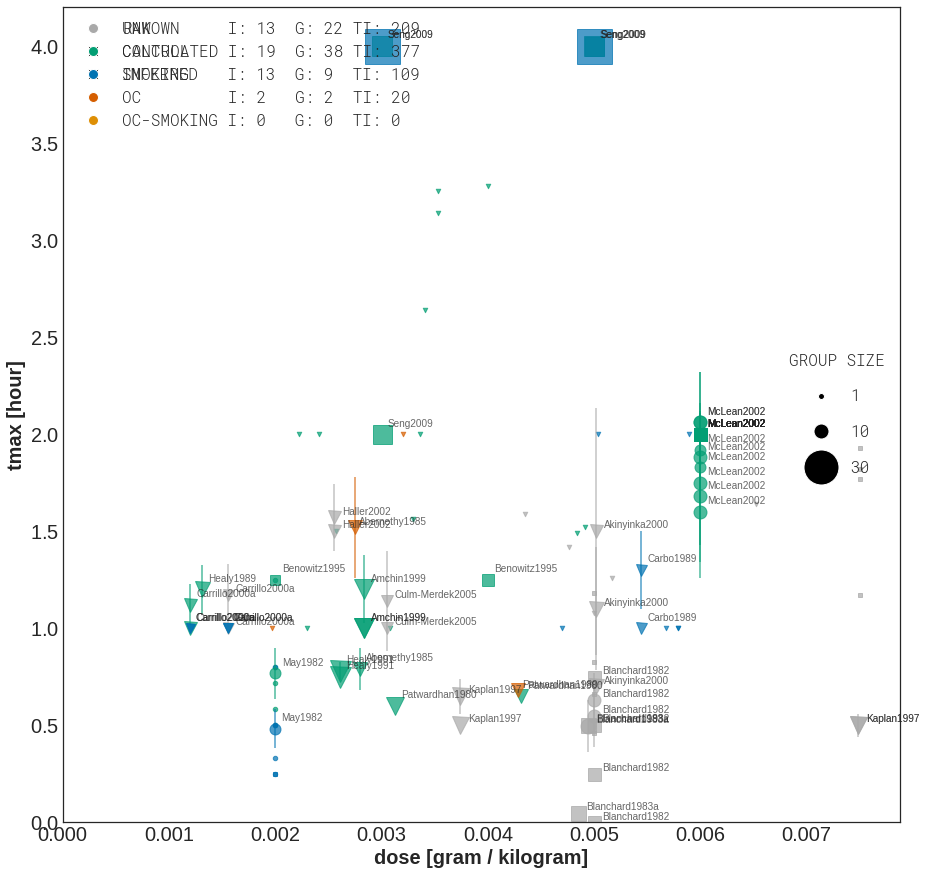

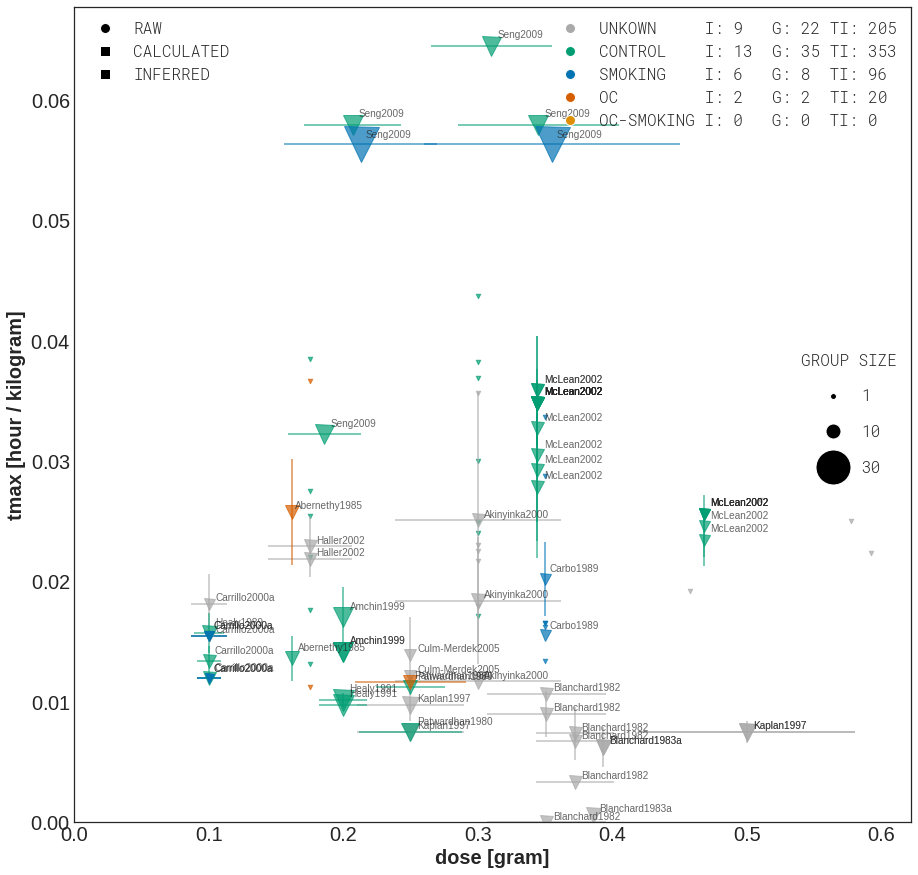

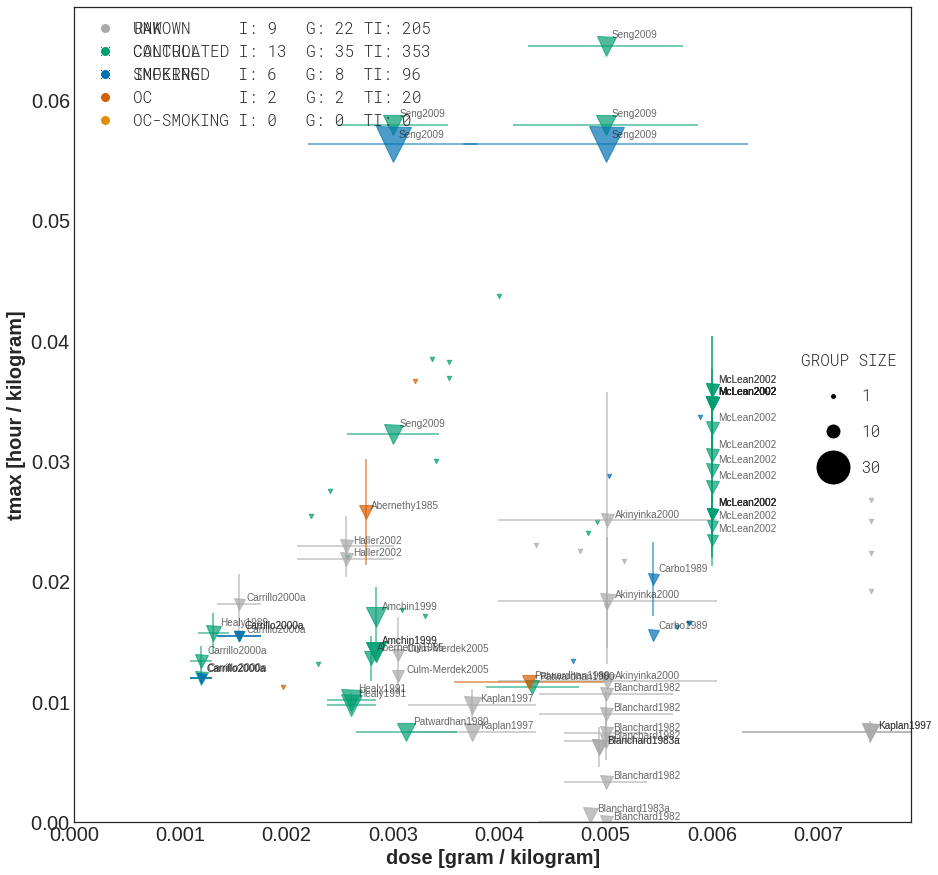

In [59]:
create_plots(caffeine_max,categories_strict,"reports/strict","tmax")

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 4   G: 22 TI: 204
CONTROL    I: 68  G: 54 TI: 666
SMOKING    I: 15  G: 11 TI: 138
OC         I: 2   G: 4  TI: 40 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 8   G: 19 TI: 176
CONTROL    I: 24  G: 41 TI: 410
SMOKING    I: 13  G: 9  TI: 109
OC         I: 2   G: 2  TI: 20 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 4   G: 19 TI: 172
CONTROL    I: 18  G: 38 TI: 386
SMOKING    I: 6   G: 8  TI: 96 
OC         I: 2   G: 2  TI: 20 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 4   G: 19 TI: 172
CONTROL    I: 18  G: 38 TI: 386
SMOKING    I: 6   G: 8  TI: 96 
OC         I: 2   G: 2  TI: 20 


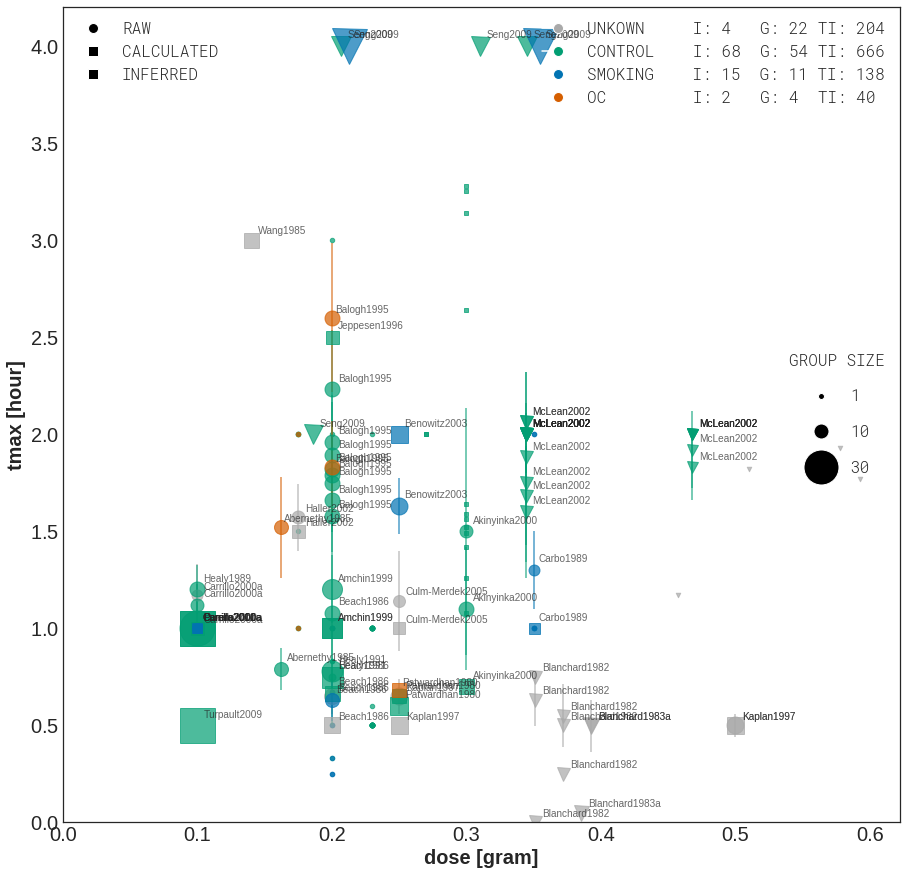

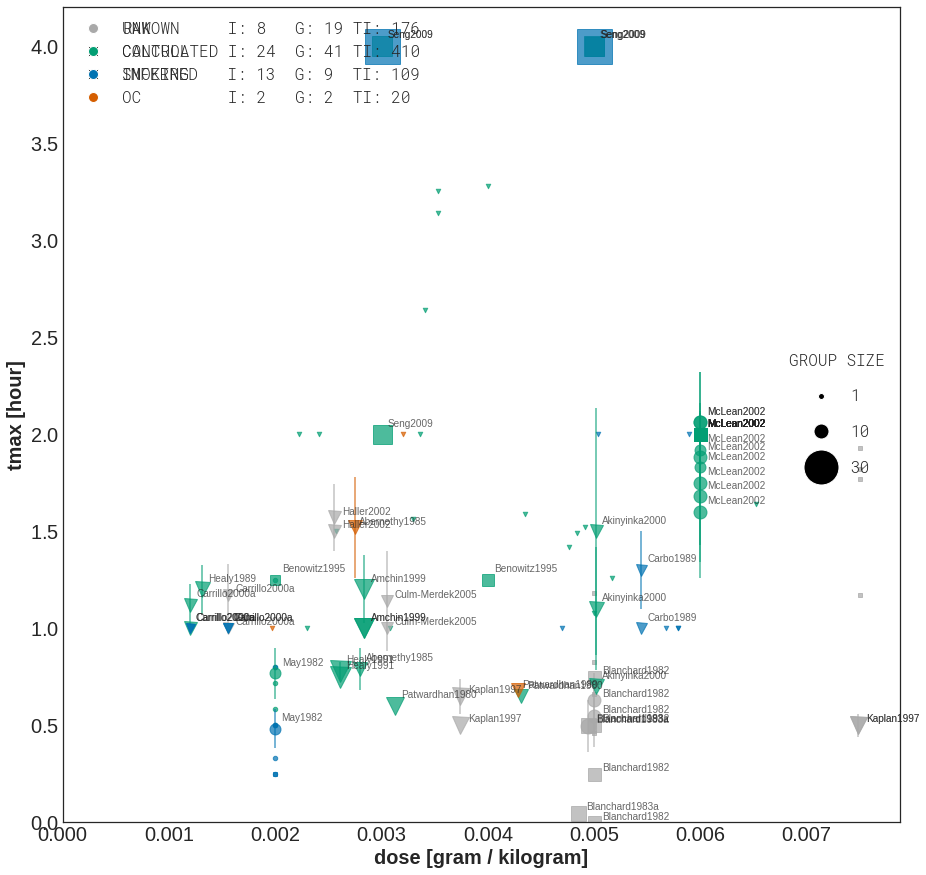

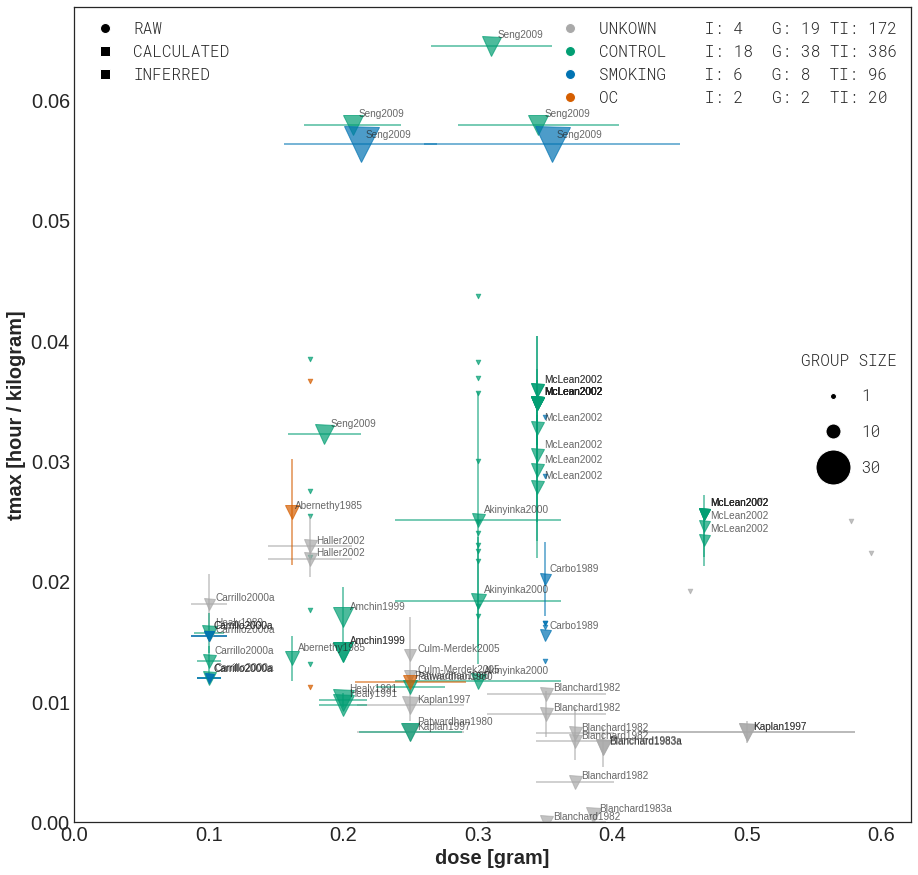

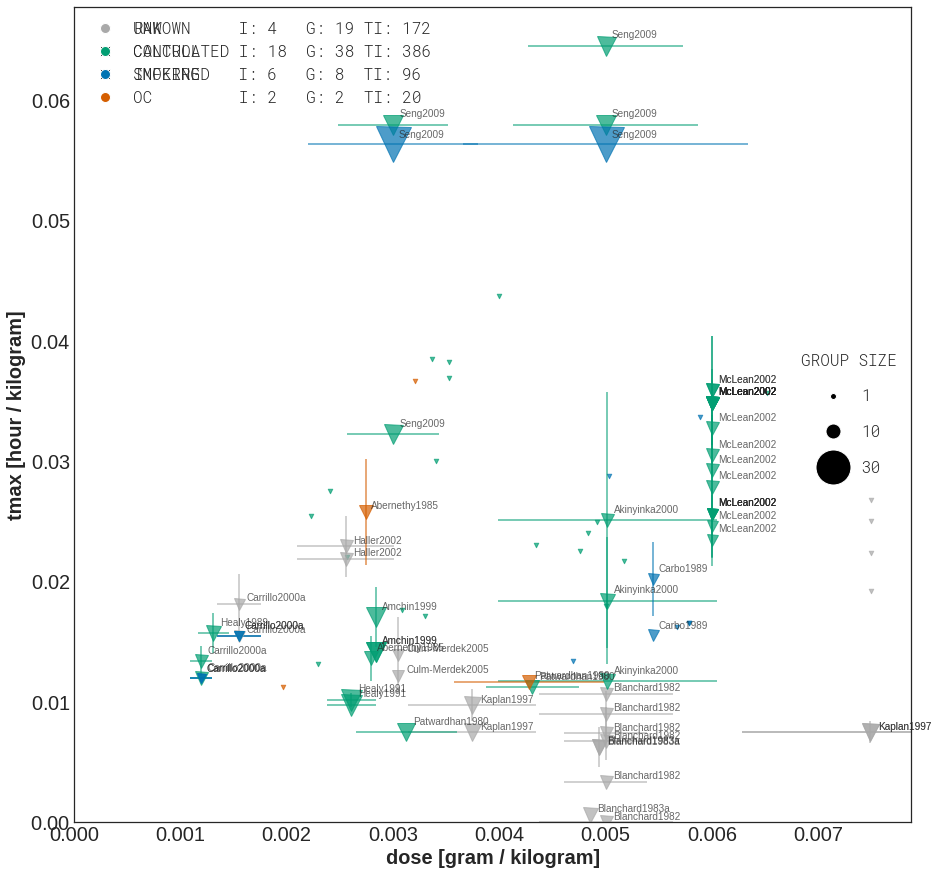

In [60]:
create_plots(caffeine_max,categories_soft,"reports/soft","tmax")

In [61]:
caffeine_instance = PkdbModel("caffeine_vd",destination="3-inferred")
caffeine_instance.read()
caffeine_instance_data = caffeine_instance.data
caffeine_instance_data["outlier"] = False
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Balogh1992","outlier"] = True
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Harder1988","outlier"] = True
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Harder1989","outlier"] = True

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 33  G: 46 TI: 398
CONTROL    I: 96  G: 56 TI: 709
SMOKING    I: 57  G: 11 TI: 247
OC         I: 19  G: 6  TI: 75 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 31  G: 39 TI: 330
CONTROL    I: 85  G: 43 TI: 530
SMOKING    I: 49  G: 9  TI: 220
OC         I: 19  G: 4  TI: 55 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 31  G: 46 TI: 417
CONTROL    I: 130 G: 48 TI: 621
SMOKING    I: 49  G: 10 TI: 227
OC         I: 28  G: 4  TI: 64 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 35  G: 39 TI: 334
CONTROL    I: 91  G: 46 TI: 554
SMOKING    I: 56  G: 10 TI: 233
OC         I: 19  G: 4  TI: 55 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 14  G: 41 TI: 344
CONTROL    I: 109 G: 58 TI: 734
SMOKING    I: 72  G: 14 TI: 285
OC         I: 28  G: 6  TI: 84 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 14  G: 37 TI: 297
CONTROL    I: 97  G: 44 TI: 552
SMOKING    I: 63  G: 10 TI: 240
OC         I: 28  G: 4  TI: 64 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 14  G: 43 TI: 376
CONTROL    I: 142 G: 49 TI: 643
SMOKING    I: 63  G: 12 TI: 255
OC         I: 37  G: 4  TI: 73 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 18  G: 37 TI: 301
CONTROL    I: 103 G: 47 TI: 576
SMOKING    I: 70  G: 11 TI: 253
OC         I: 28  G: 4  TI: 64 


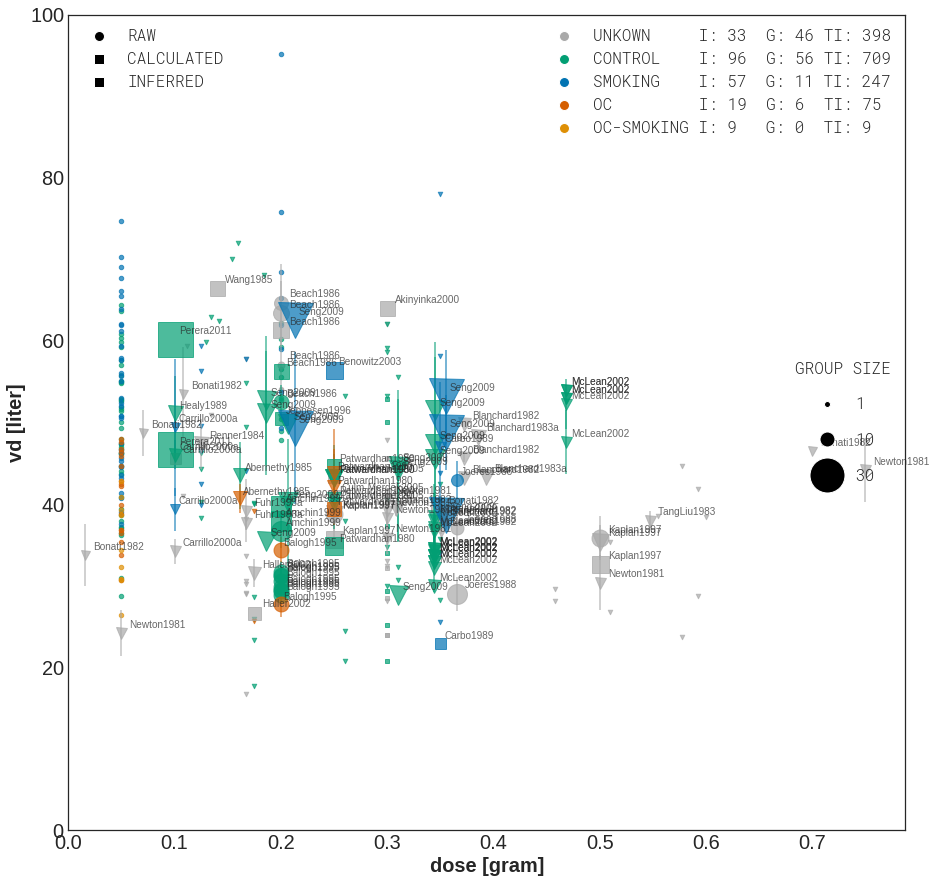

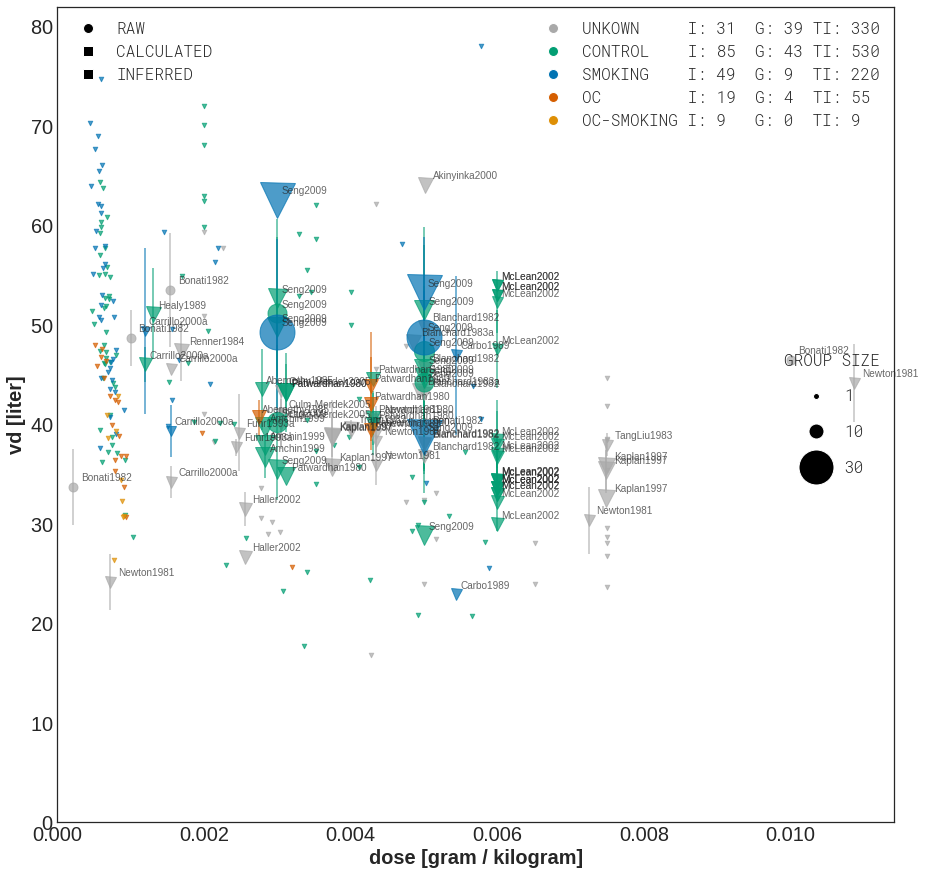

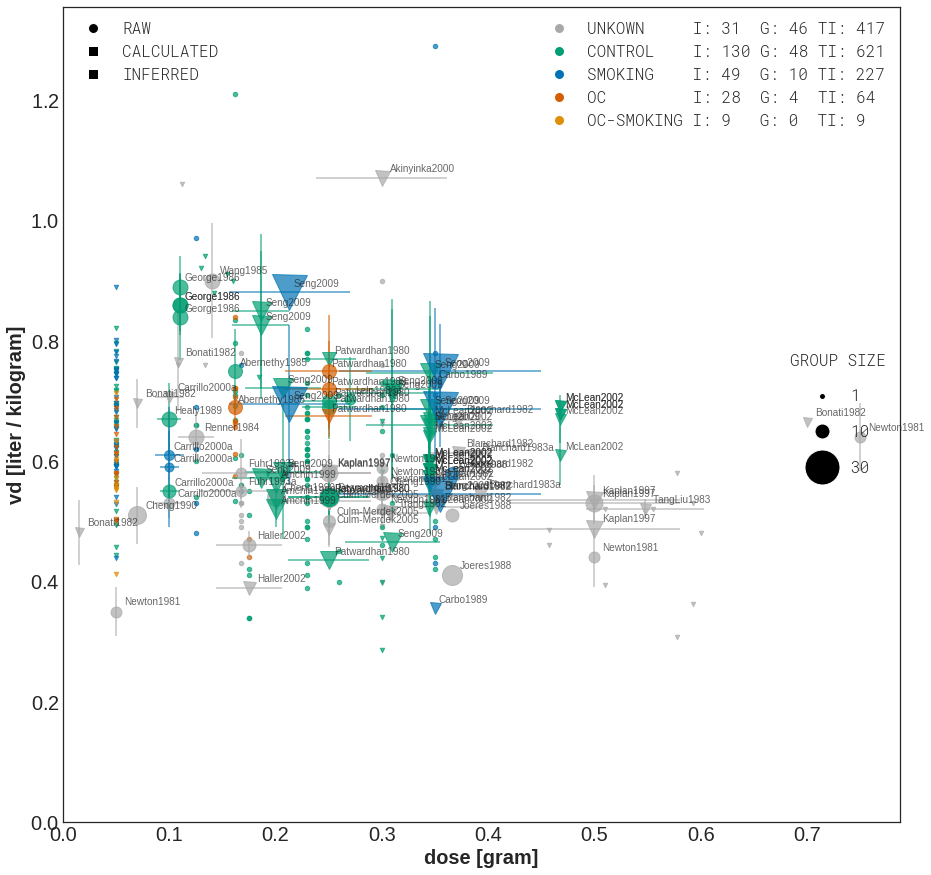

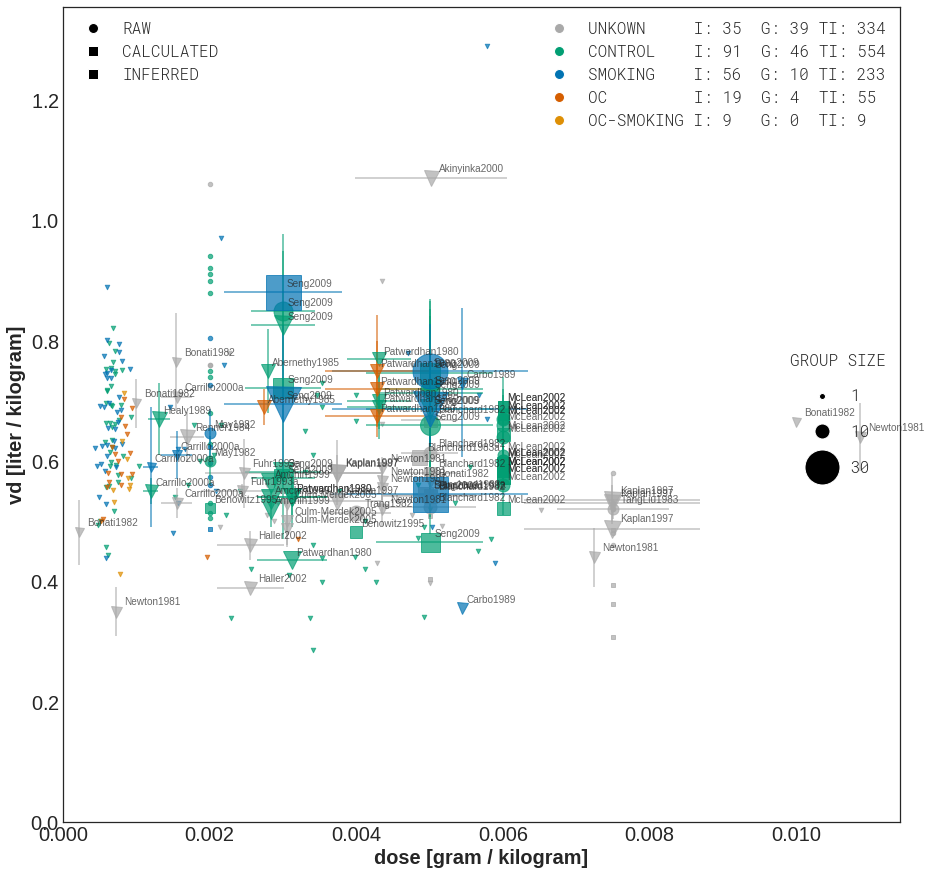

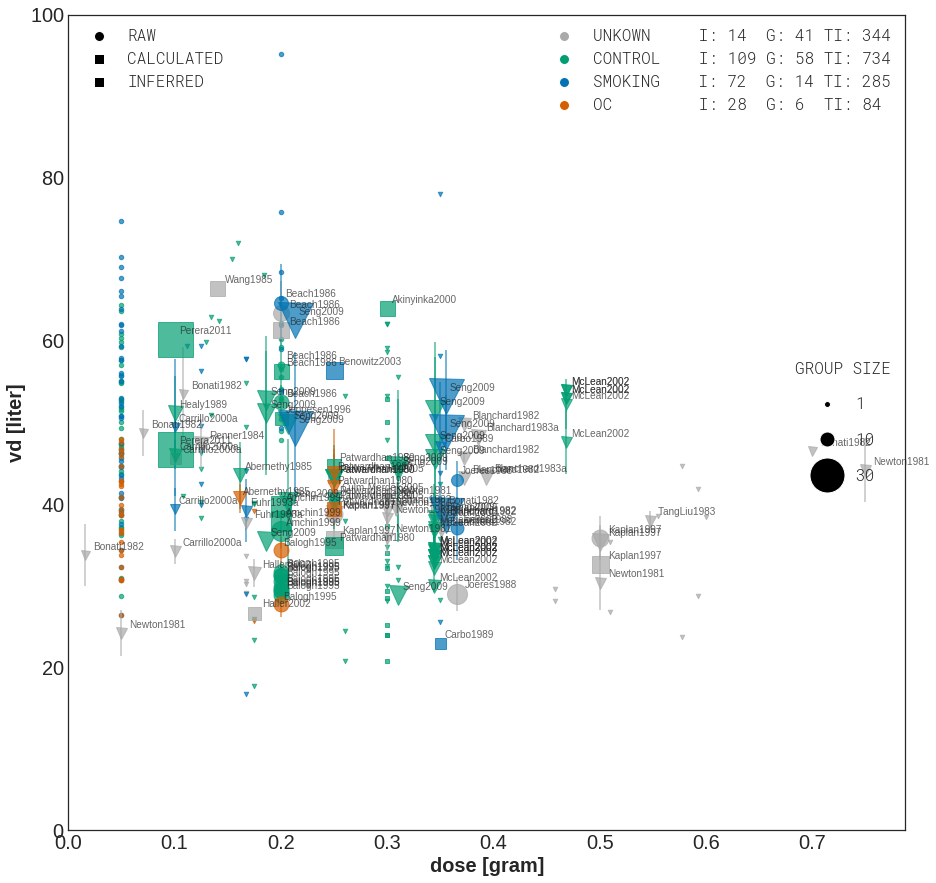

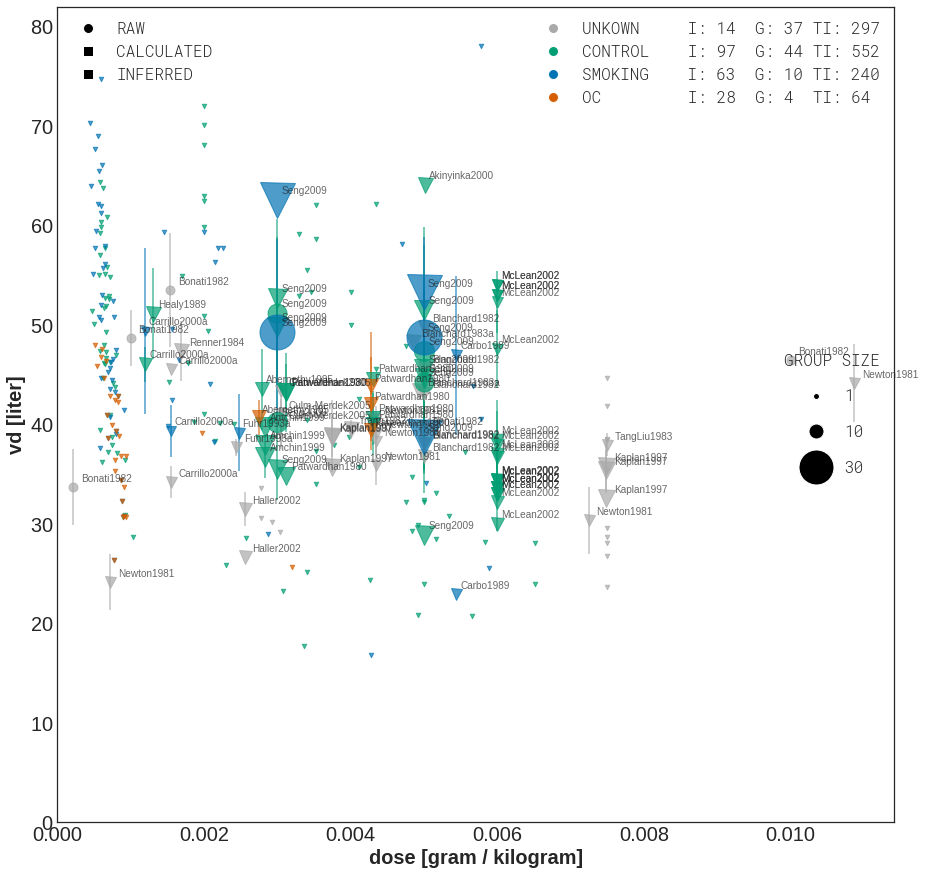

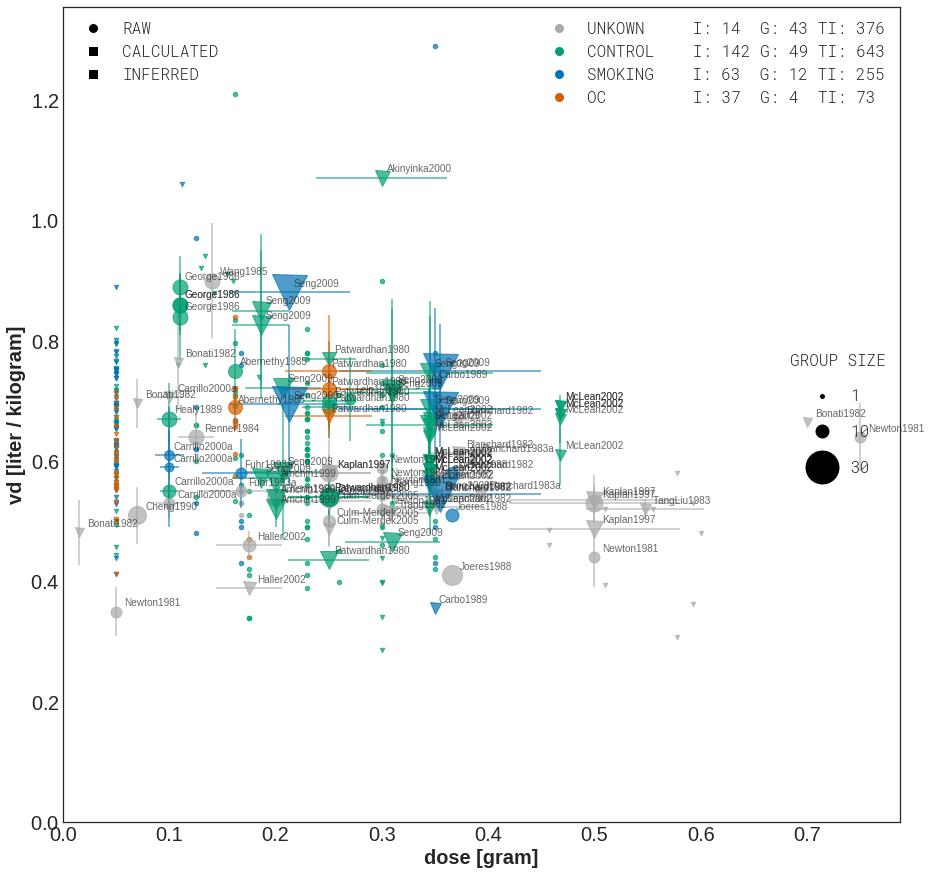

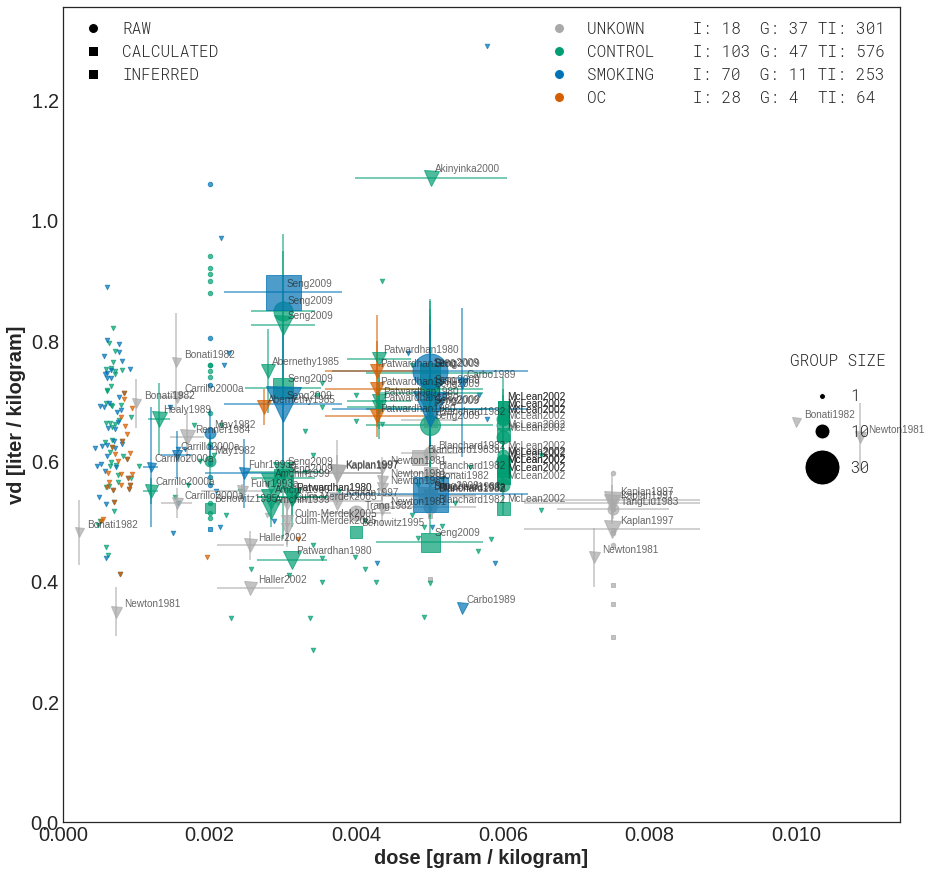

In [62]:
create_plots(caffeine_instance_data,categories_strict,"reports/strict","vd")
create_plots(caffeine_instance_data,categories_soft,"reports/soft","vd")

In [63]:
caffeine_instance = PkdbModel("caffeine_auc_inf",destination="3-inferred")
caffeine_instance.read()
caffeine_instance_data = caffeine_instance.data
caffeine_instance_data["outlier"] = False
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Balogh1992","outlier"] = True
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Harder1988","outlier"] = True
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Harder1989","outlier"] = True
#caffeine_instance_data.dropna(subset=["value"], inplace=True)

In [64]:
caffeine_instance_data["mean"].dropna()

0      0.031200
1      0.009950
2      0.022000
3      0.065200
4      0.062300
5      0.064500
6      0.061900
7      0.061400
8      0.059200
9      0.056700
10     0.056700
11     0.027600
12     0.068400
13     0.069100
14     0.065600
15     0.069000
16     0.069100
17     0.021400
18     0.021400
19     0.022600
20     0.020600
21     0.021800
22     0.020000
23     0.022400
24     0.020400
25     0.021800
33     0.066000
34     0.016300
35     0.116000
36     0.098300
         ...   
498    0.001055
499    0.001045
500    0.000931
501    0.000494
502    0.001598
503    0.001024
504    0.000150
505    0.000151
506    0.000113
507    0.000409
508    0.000412
509    0.001040
510    0.000930
511    0.000868
512    0.000691
513    0.000670
514    0.000631
515    0.000686
516    0.000678
517    0.000585
518    0.000584
519    0.001355
520    0.000270
521    0.000576
522    0.001266
523    0.000565
524    0.000329
525    0.000810
526    0.000561
527    0.000276
Name: mean, Length: 146,

In [65]:
#intermediate = caffeine_instance_data[(caffeine_instance_data["value"].isna() == False)]
#intermediate[intermediate["calculated"]==True]

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 19  G: 13 TI: 131
CONTROL    I: 114 G: 12 TI: 307
SMOKING    I: 43  G: 5  TI: 76 
OC         I: 17  G: 1  TI: 26 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 8   G: 12 TI: 112
CONTROL    I: 0   G: 24 TI: 206
SMOKING    I: 1   G: 2  TI: 61 
OC         I: 0   G: 0  TI: 0  
OC-SMOKING I: 0   G: 0  TI: 0  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 19  G: 11 TI: 110
CONTROL    I: 78  G: 7  TI: 163
SMOKING    I: 43  G: 4  TI: 64 
OC         I: 17  G: 1  TI: 26 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 4   G: 12 TI: 108
CONTROL    I: 0   G: 22 TI: 194
SMOKING    I: 0   G: 2  TI: 60 
OC         I: 0   G: 0  TI: 0  
OC-SMOKING I: 0   G: 0  TI: 0  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 4   G: 9  TI: 82 
CONTROL    I: 125 G: 15 TI: 346
SMOKING    I: 56  G: 6  TI: 95 
OC         I: 26  G: 1  TI: 35 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 8   G: 12 TI: 112
CONTROL    I: 0   G: 24 TI: 206
SMOKING    I: 1   G: 2  TI: 61 
OC         I: 0   G: 0  TI: 0  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 4   G: 7  TI: 61 
CONTROL    I: 89  G: 10 TI: 202
SMOKING    I: 56  G: 5  TI: 83 
OC         I: 26  G: 1  TI: 35 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 4   G: 12 TI: 108
CONTROL    I: 0   G: 22 TI: 194
SMOKING    I: 0   G: 2  TI: 60 
OC         I: 0   G: 0  TI: 0  


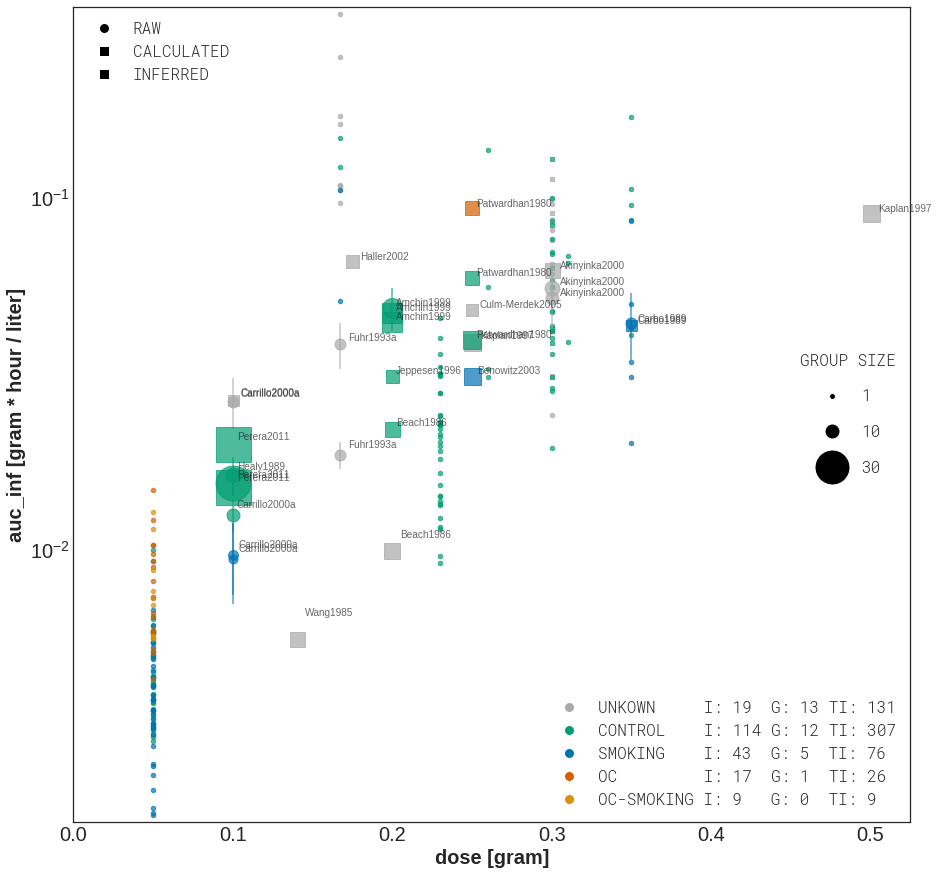

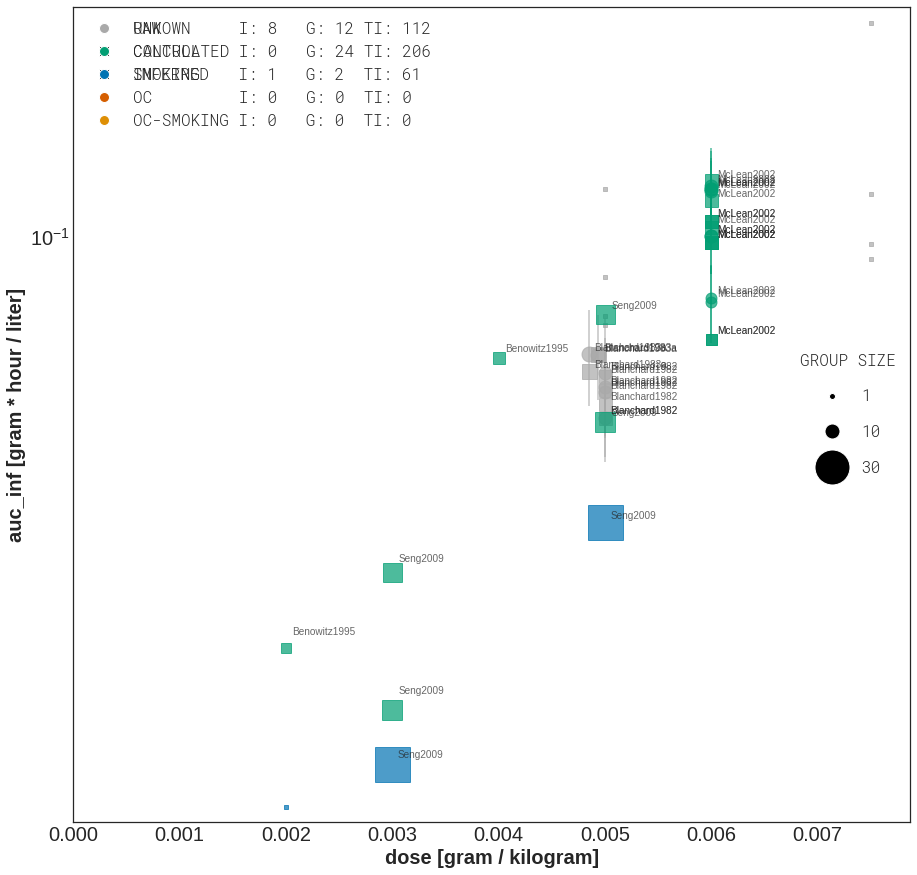

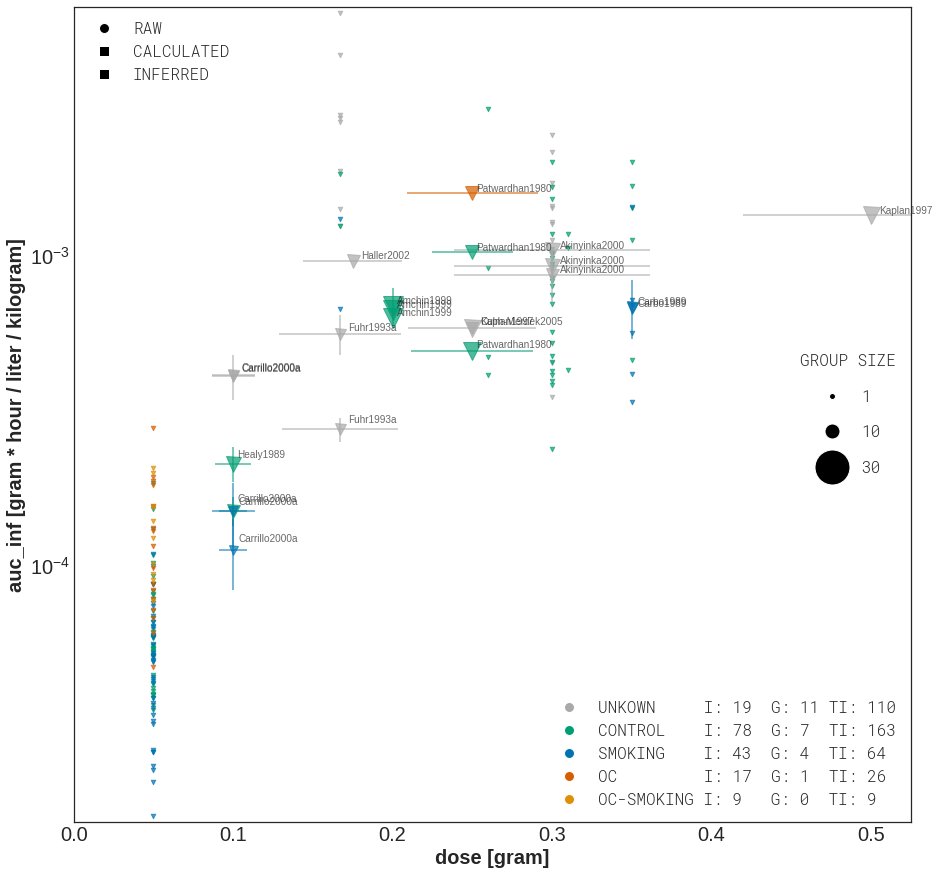

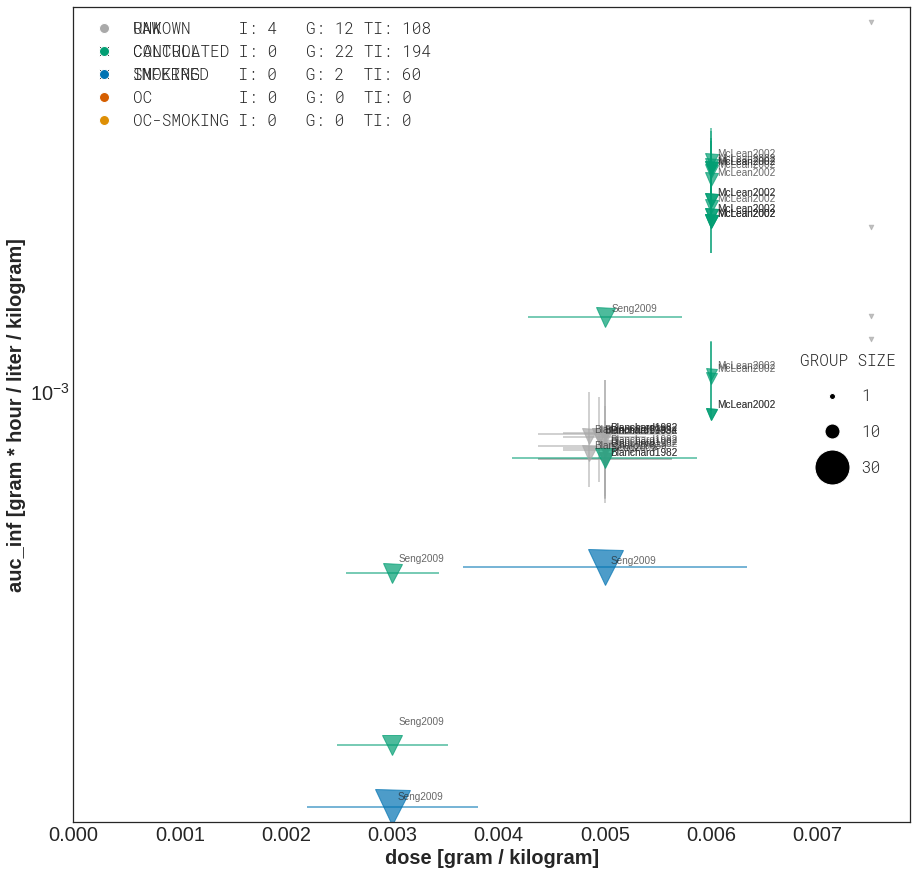

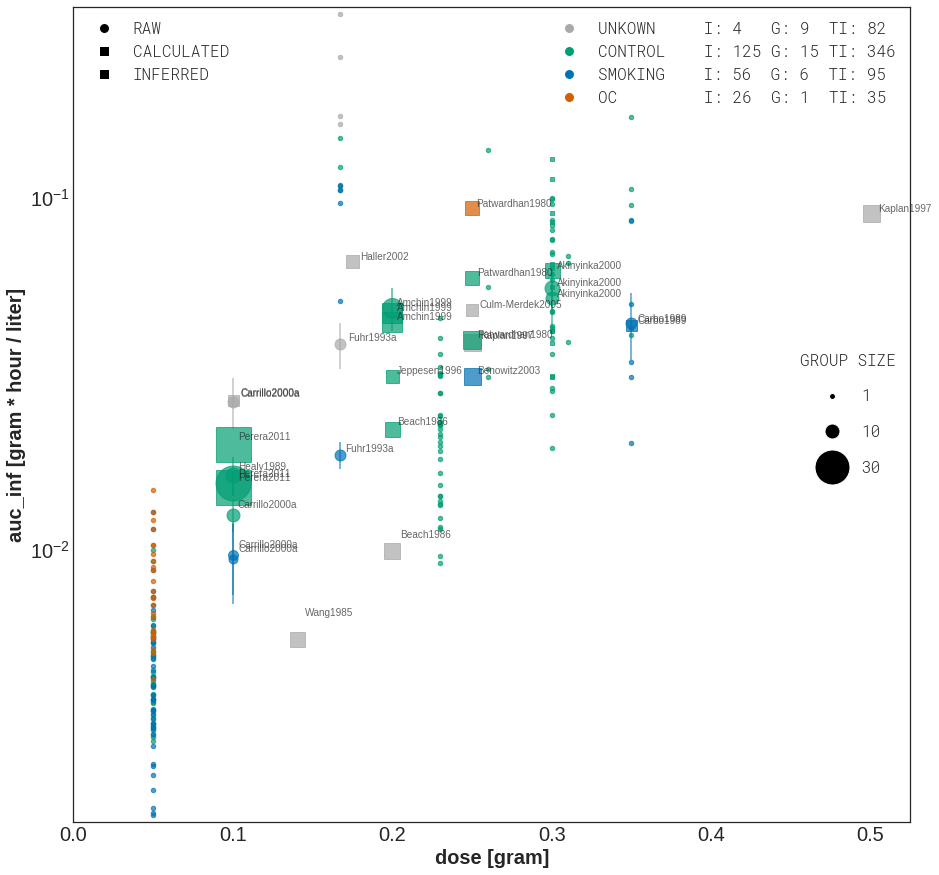

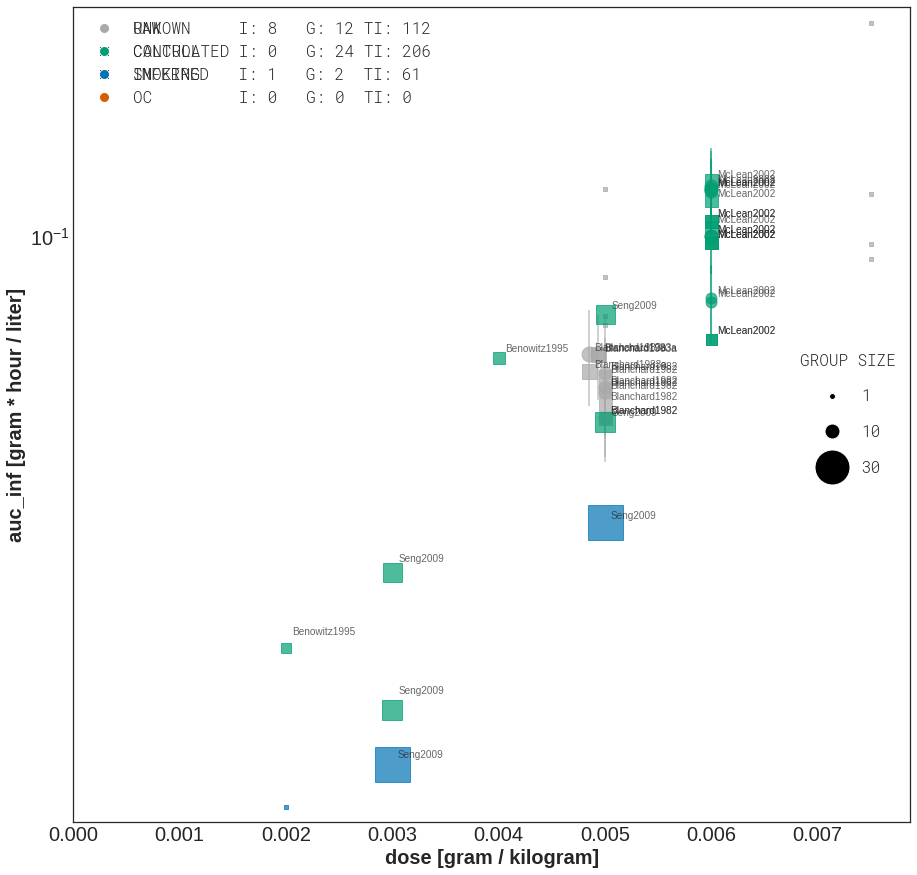

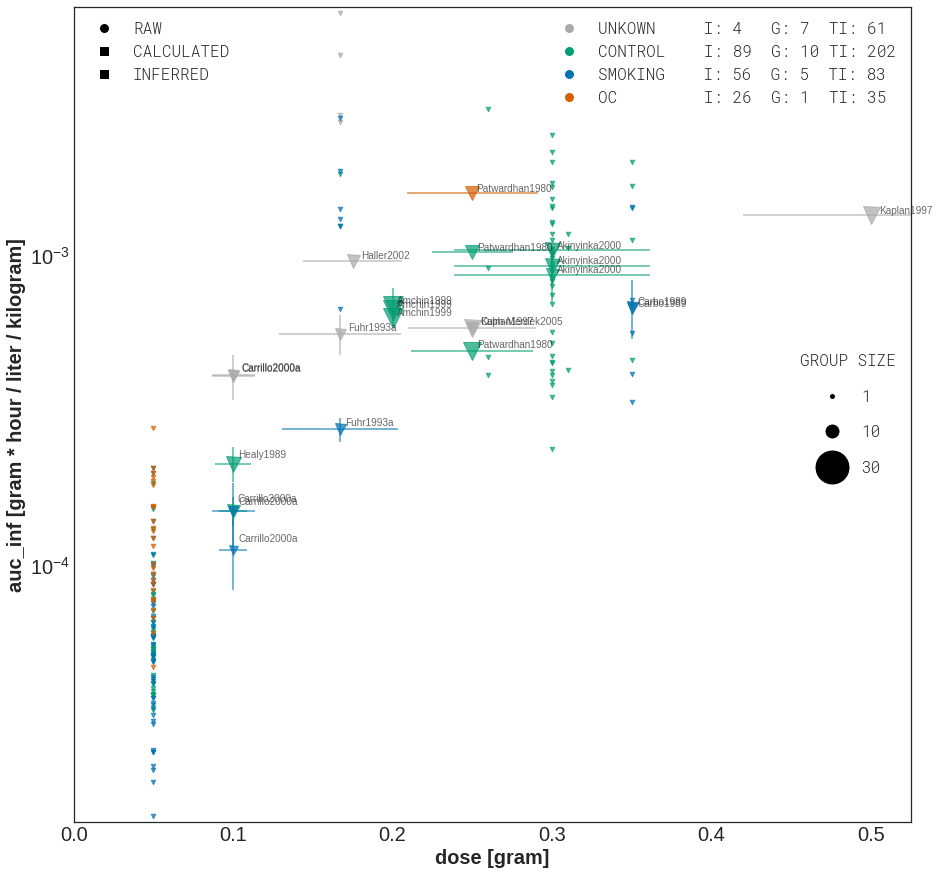

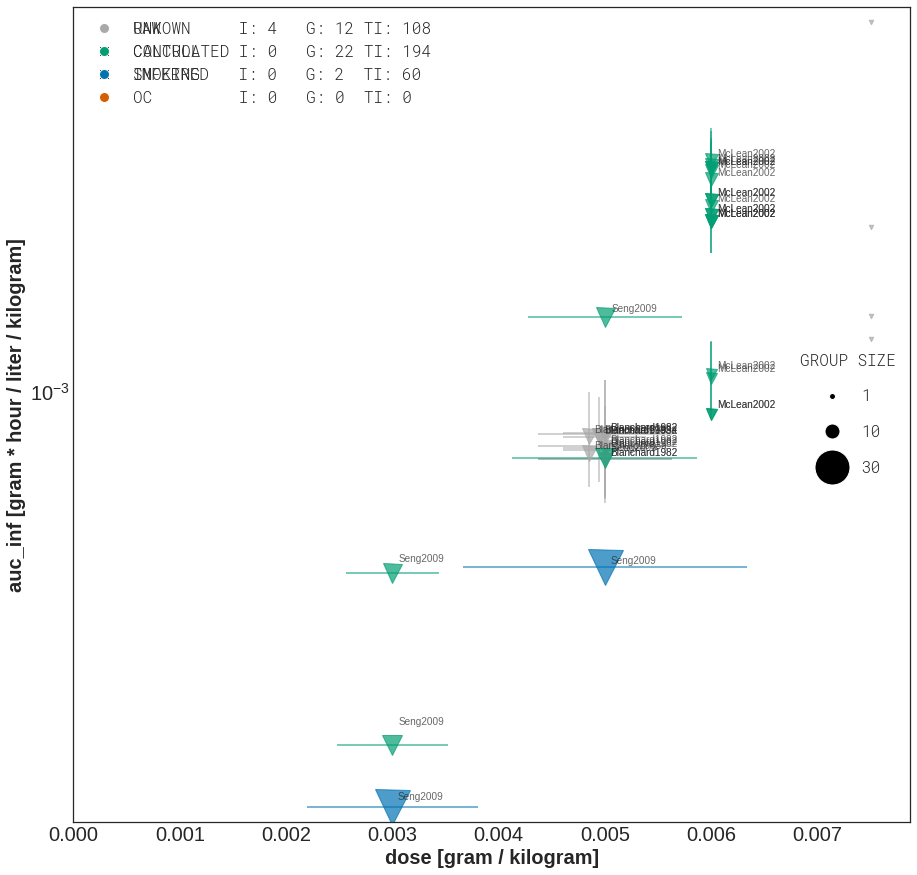

In [66]:
create_plots(caffeine_instance_data,categories_strict,"reports/strict","auc_inf", log_y=True)
create_plots(caffeine_instance_data,categories_soft,"reports/soft","auc_inf", log_y=True)

In [67]:
caffeine_instance = PkdbModel("caffeine_kel",destination="3-inferred")
caffeine_instance.read()
caffeine_instance_data = caffeine_instance.data
caffeine_instance_data["outlier"] = False
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Balogh1992","outlier"] = True
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Harder1988","outlier"] = True
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Harder1989","outlier"] = True

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 9   G: 34 TI: 271
CONTROL    I: 53  G: 34 TI: 404
SMOKING    I: 40  G: 5  TI: 123
OC         I: 22  G: 2  TI: 36 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 13  G: 31 TI: 244
CONTROL    I: 53  G: 32 TI: 338
SMOKING    I: 41  G: 4  TI: 112
OC         I: 22  G: 2  TI: 36 
OC-SMOKING I: 9   G: 0  TI: 9  


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 4   G: 33 TI: 256
CONTROL    I: 58  G: 35 TI: 419
SMOKING    I: 49  G: 5  TI: 132
OC         I: 31  G: 2  TI: 45 


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/ipykernel_launcher.py:27: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


UNKOWN     I: 8   G: 30 TI: 229
CONTROL    I: 58  G: 33 TI: 353
SMOKING    I: 50  G: 4  TI: 121
OC         I: 31  G: 2  TI: 45 


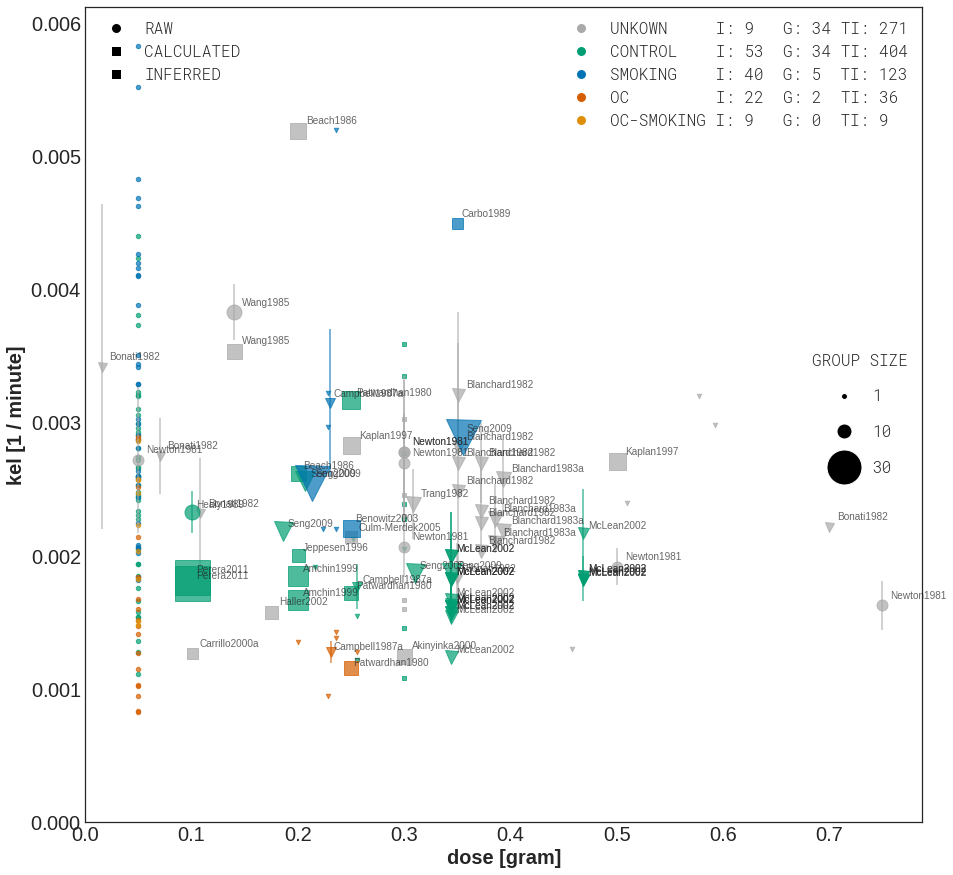

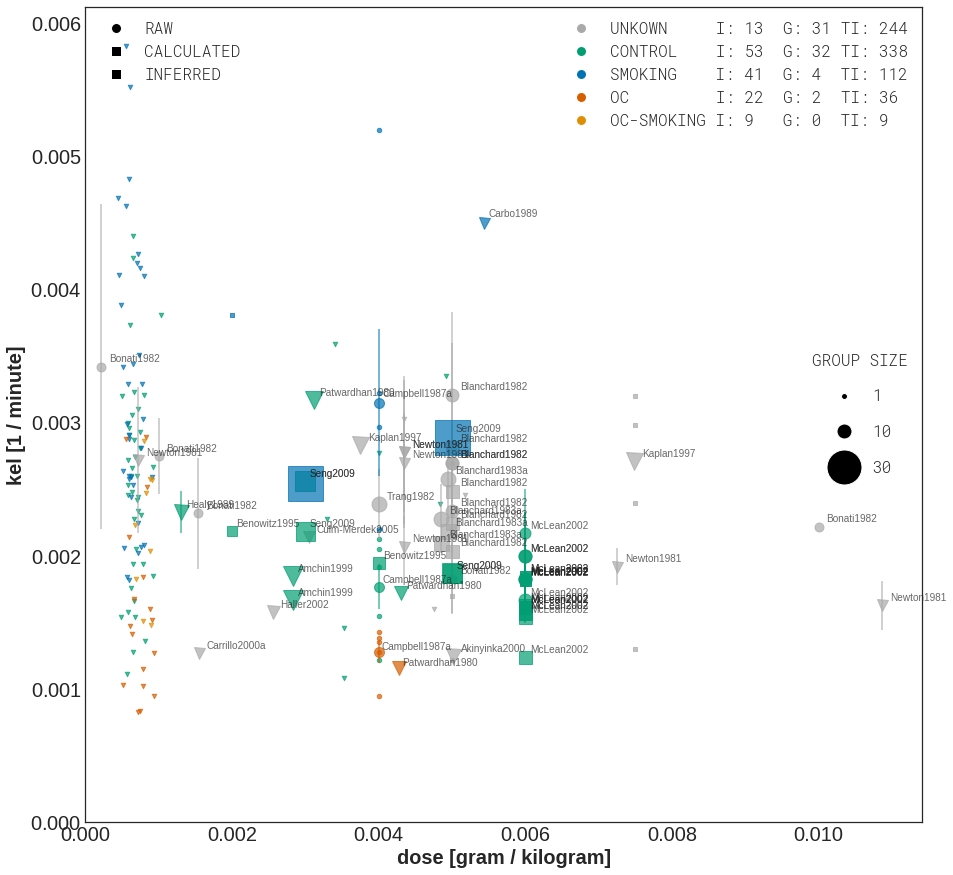

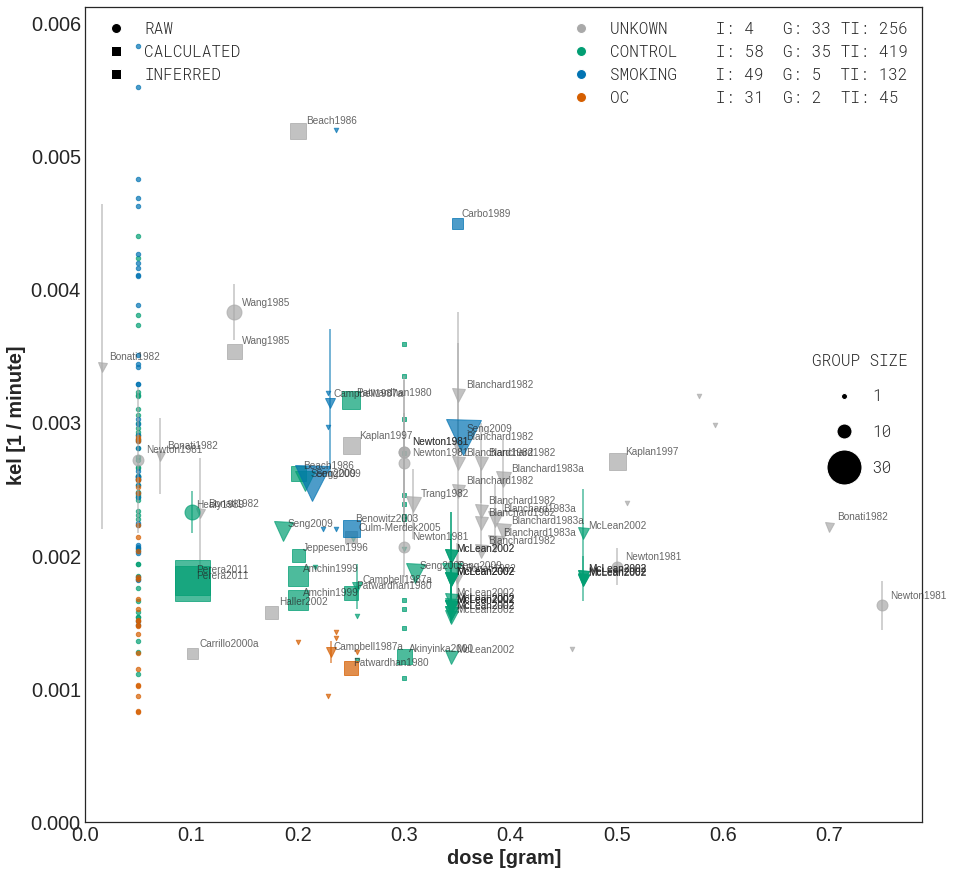

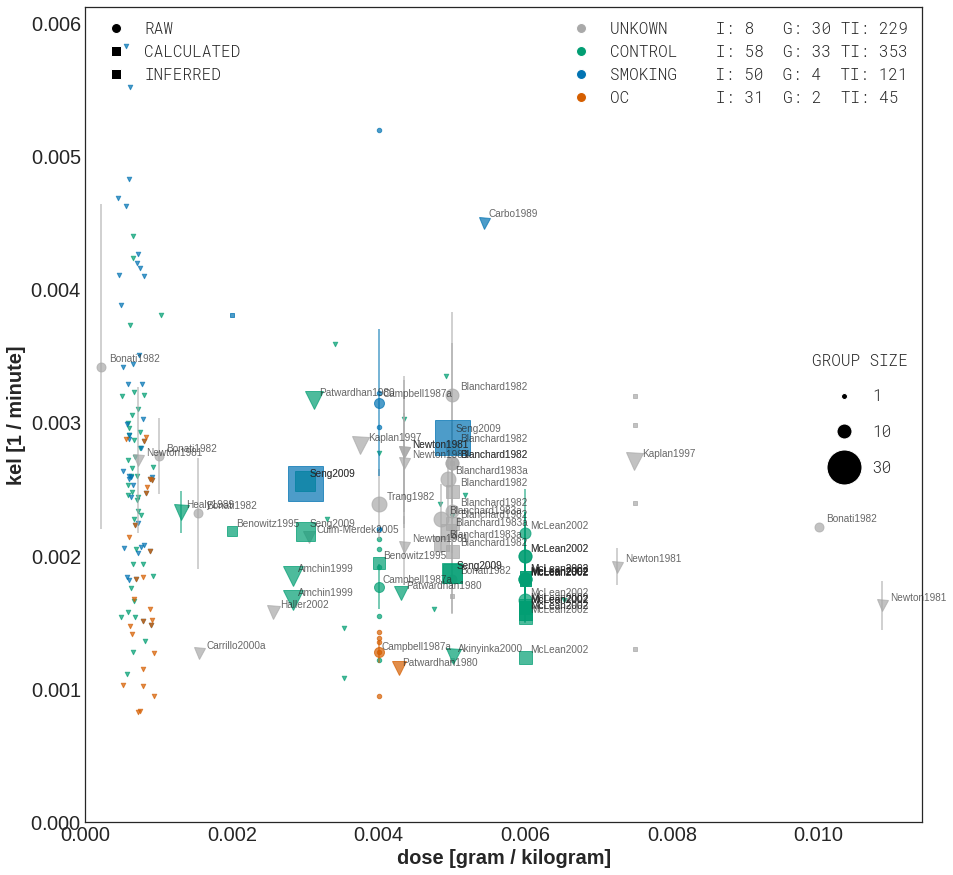

In [68]:
create_plots(caffeine_instance_data,categories_strict,"reports/strict","kel")
create_plots(caffeine_instance_data,categories_soft,"reports/soft","kel")

In [69]:
caffeine_thalf.dropna(axis=0, subset=["group_count"])[["mean", "group_count","sd","se","cv","unit"]]

mean  group_count        sd        se     cv   unit
0     4.600000         12.0  2.200000  0.635000  0.478     hr
1     5.220000         12.0       NaN       NaN    NaN     hr
18    2.190000         11.0  0.440000  0.133000  0.201     hr
19    2.230000         11.0       NaN       NaN    NaN     hr
20    4.300000         10.0  1.020000  0.323000  0.237     hr
21    4.400000         10.0       NaN       NaN    NaN     hr
22    2.090000          9.0  0.410000  0.137000  0.196     hr
23    4.660000         10.0  2.110000  0.667000  0.453     hr
24    4.700000         10.0  1.520000  0.481000  0.323     hr
25    4.820000         10.0  2.410000  0.762000  0.500     hr
26    4.440000         10.0  1.480000  0.468000  0.333     hr
27    3.320000         10.0  0.840000  0.266000  0.253     hr
28    4.150000         10.0  1.590000  0.503000  0.383     hr
29    3.960000         10.0  1.210000  0.383000  0.306     hr
30    4.190000         10.0  1.260000  0.398000  0.301     hr
31    9.150000         10.0  2.650000  0.838000  0.290     hr
32    4.940000          8.0       NaN       NaN    NaN     hr
33    4.280000          8.0       NaN       NaN    NaN     hr
34    5.660000          8.0       NaN       NaN    NaN     hr
35    5.130000          8.0       NaN       NaN    NaN     hr
36    3.700000          8.0       NaN       NaN    NaN     hr
37    4.630000          8.0       NaN       NaN    NaN     hr
38    3.620000          8.0       NaN       NaN    NaN     hr
39    4.100000          8.0       NaN       NaN    NaN     hr
40    5.280000          5.0       NaN       NaN    NaN     hr
41    5.920000          7.0       NaN       NaN    NaN     hr
42    5.510000         10.0       NaN       NaN    NaN     hr
43    5.270000         10.0       NaN       NaN    NaN     hr
44    3.200000         12.0  1.100000  0.318000  0.344     hr
45    3.400000         12.0  1.200000  0.346000  0.353     hr
...        ...          ...       ...       ...    ...    ...
1702  0.123345          8.0       NaN       NaN    NaN  hr/kg
1703  0.128223          8.0       NaN       NaN    NaN  hr/kg
1704  0.081538          6.0       NaN       NaN    NaN  hr/kg
1705  0.080513          6.0       NaN  0.007051  0.215  hr/kg
1706  0.073077          6.0       NaN  0.009615  0.322  hr/kg
1707  0.081538          6.0       NaN       NaN    NaN  hr/kg
1708  0.080128          6.0       NaN       NaN    NaN  hr/kg
1709  0.080128          6.0       NaN       NaN    NaN  hr/kg
1710  0.074286          4.0       NaN       NaN    NaN  hr/kg
1711  0.090000          4.0       NaN       NaN    NaN  hr/kg
1712  0.060000          4.0       NaN       NaN    NaN  hr/kg
1713  0.071429          4.0       NaN       NaN    NaN  hr/kg
1714  0.048571          4.0       NaN       NaN    NaN  hr/kg
1715  0.069444          5.0       NaN  0.010417  0.335  hr/kg
1716  0.073973          6.0  0.034247  0.013973  0.463  hr/kg
1717  0.072113         30.0  0.015211  0.002775  0.211  hr/kg
1718  0.059296         30.0  0.020000  0.003648  0.337  hr/kg
1719  0.063803         30.0       NaN       NaN    NaN  hr/kg
1720  0.056338         30.0       NaN       NaN    NaN  hr/kg
1721  0.077258         14.0  0.036290  0.009694  0.470  hr/kg
1722  0.082581         14.0  0.048871  0.013065  0.592  hr/kg
1723  0.085000         14.0       NaN       NaN    NaN  hr/kg
1724  0.099839         14.0       NaN       NaN    NaN  hr/kg
1725  0.089420         15.0       NaN       NaN    NaN  hr/kg
1726  0.065362         15.0       NaN       NaN    NaN  hr/kg
1727  0.070435         15.0  0.023043  0.005957  0.327  hr/kg
1728  0.080580         15.0  0.031304  0.008087  0.388  hr/kg
1729  0.062857         10.0       NaN       NaN    NaN  hr/kg
1730  0.159170          5.0       NaN  0.012111  0.170  hr/kg
1731  0.106250          5.0       NaN  0.012500  0.263  hr/kg

[460 rows x 6 columns]

In [70]:
caffeine_absolute = caffeine_thalf[caffeine_thalf["unit"]=="hour"]
caffeine_absolute = caffeine_absolute[caffeine_absolute["unit_intervention"] == "gram / kilogram"]

caffeine_absolute = caffeine_absolute[~caffeine_absolute["outlier"]]

caffeine_absolute = caffeine_absolute.dropna(subset=["value"])


/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/numpy/lib/histograms.py:823: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges
No handles with labels found to put in legend.


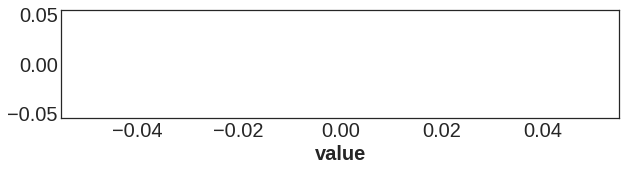

In [71]:

plt.figure(figsize= (10,2))
sns.distplot(caffeine_absolute[smoking_idx(caffeine_absolute)]["value"], bins=None,   color="blue");
sns.distplot(caffeine_absolute[oc_idx(caffeine_absolute)]["value"], bins=None,  color="green");
#sns.distplot(caffeine_absolute[oc_smoking_strict(caffeine_absolute)]["value"], bins=20,   label="oc_smoking");
sns.distplot(caffeine_absolute[control_idx(caffeine_absolute)]["value"], bins=None, color="black");
#sns.distplot(caffeine_thalf[rest_idx(caffeine_thalf)]["value"], bins=20, kde=False, label="unknown");

plt.legend()



In [72]:

caffeine_absolute = caffeine_thalf[caffeine_thalf["unit"]=="hr"]
caffeine_absolute = caffeine_absolute[caffeine_absolute["unit_intervention"] == "mg"]
caffeine_absolute = caffeine_absolute.dropna(subset=["mean"])
caffeine_absolute = caffeine_absolute[~caffeine_absolute["outlier"]]

frames = []
for i, data in caffeine_absolute.iterrows():
    for _ in range(int(data["group_count"])):
        data["value"] = data["mean"]
        frames.append(data)

caffeine_absolute1 =  pd.concat(frames, axis=1).T


frames = []
for i, data in caffeine_absolute.iterrows():
    mean = data["mean"]
    sd = data["sd"]
    for _ in range(int(data["group_count"])):
        
        if not np.isnan(sd):
            value = -1

            while value < 0:
                value = np.random.normal(mean,sd)
            data["value"] = value

            

        else:
            data["value"] = data["mean"]
            
        frames.append(data)

caffeine_absolute2 =  pd.concat(frames, axis=1).T


In [73]:
len(caffeine_absolute2)

1310

In [74]:
caffeine_absolute = caffeine_thalf[caffeine_thalf["unit"]=="hour"]
caffeine_absolute = caffeine_absolute[caffeine_absolute["unit_intervention"] == "gram"]
caffeine_absolute = caffeine_absolute[~caffeine_absolute["outlier"]]
len(caffeine_absolute)

0

In [75]:
#caffeine_absolute = caffeine_absolute1
#caffeine_absolute = caffeine_absolute2
#caffeine_absolute = caffeine_absolute.reset_index()

caffeine_absolute = caffeine_absolute.dropna(subset=["value"]).append(caffeine_absolute1)
len(caffeine_absolute)

1310

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


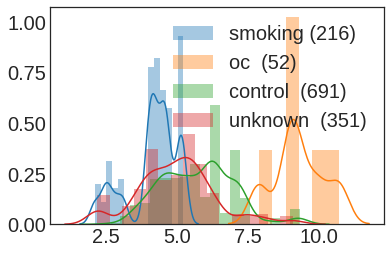

In [76]:
smoking = caffeine_absolute[smoking_idx(caffeine_absolute)]["value"].to_list()
oc = caffeine_absolute[oc_idx(caffeine_absolute)]["value"].to_list()
control = caffeine_absolute[control_idx(caffeine_absolute)]["value"].to_list()
rest = caffeine_absolute[rest_idx(caffeine_absolute)]["value"].to_list()

sns.distplot(smoking, bins=None,   label=f"smoking ({len(smoking)})")
sns.distplot(oc, bins=None,  label=f"oc  ({len(oc)})")
sns.distplot(control, bins=None, label=f"control  ({len(control)})")
sns.distplot(rest, bins=None, label=f"unknown  ({len(rest)})")

plt.legend()

/home/janekg89/Envs/pkdb_analysis/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


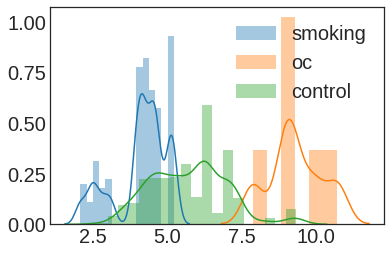

In [77]:
#caffeine_absolute = caffeine_absolute1
caffeine_absolute = caffeine_absolute1
caffeine_absolute = caffeine_absolute.reset_index()

sns.distplot(caffeine_absolute[smoking_idx(caffeine_absolute)]["mean"].to_list(), bins=None,   label="smoking")
sns.distplot(caffeine_absolute[oc_idx(caffeine_absolute)]["mean"].to_list(), bins=None,  label="oc")
sns.distplot(caffeine_absolute[control_idx(caffeine_absolute)]["mean"].to_list(), bins=None, label="control")
plt.legend()

In [78]:
caffeine_instance = PkdbModel("caffeine_vd",destination="3-inferred")
caffeine_instance.read()
caffeine_instance_data = caffeine_instance.data
caffeine_instance_data["outlier"] = False
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Balogh1992","outlier"] = True
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Harder1988","outlier"] = True
caffeine_instance_data.loc[caffeine_instance_data["study"]== "Harder1989","outlier"] = True

In [79]:
caffeine_instance_data.columns.to_list()

#yinterp = interpolate.UnivariateSpline(x, y, s = 5e8)(x) 


['study',
 'output_type',
 'pk',
 'access',
 'measurement_type',
 'tissue',
 'allowed_users',
 'substance',
 'raw_pk',
 'interventions',
 'unit',
 'calculated',
 'group_count',
 'group_name',
 'group_pk',
 'mean',
 'individual_pk',
 'individual_name',
 'value',
 'timecourse_pk',
 'time_unit',
 'time',
 'se',
 'cv',
 'sd',
 'pharmacokinetics',
 'figure',
 'max',
 'min',
 'median',
 'choice',
 'raw_pk_intervention',
 'allowed_users_intervention',
 'measurement_type_intervention',
 'access_intervention',
 'route',
 'substance_intervention',
 'unit_intervention',
 'value_intervention',
 'application',
 'time_intervention',
 'time_unit_intervention',
 'form',
 'choice_intervention',
 'min_intervention',
 'max_intervention',
 'se_intervention',
 'sd_intervention',
 'subject_type',
 'subject_pk',
 ('study', ''),
 ('subject_name', ''),
 ('species', 'choice'),
 ('species', 'count'),
 ('healthy', 'choice'),
 ('healthy', 'count'),
 ('sex', 'choice'),
 ('sex', 'count'),
 ('age', 'count'),
 ('age',

In [80]:
import matplotlib.pyplot as plt
from scipy import interpolate

unit_intervention = "gram"
unit = "liter / hour"

caffeine_abs_abs= caffeine_clearance[(caffeine_clearance["unit_intervention"] == unit_intervention) &(caffeine_clearance["unit"] == unit)]#[["value","value_intervention"]]
caffeine_abs_abs["value"] = caffeine_abs_abs["mean"]
for category in categories_soft:
    d = caffeine_abs_abs[category.data_idx(caffeine_abs_abs)]
    d.sort_values("value_intervention", inplace=True)
    linear_fit = np.polyfit(d["value_intervention"], d["value"], 3)
    #sns.regplot("value_intervention","value", d, order=3,truncate=True, label =category.name,)
    
    #yinterp = interpolate.UnivariateSpline(d["value_intervention"],d["value"], s = 5e8)(d["value_intervention"]) 
    #plt.plot(x, y, 'bo', label = 'Original')
    #plt.plot(x, yinterp, 'r', label = 'Interpolated'
plt.legend()

TypeError: expected non-empty vector for x

In [ ]:
caffeine_clearance[(caffeine_clearance["outlier"] == False) &
(caffeine_clearance["unit_intervention"] == "gram / kilogram") &(caffeine_clearance["unit"] == "liter / hour / kilogram")].sort_values("value",ascending=False)[["study","value"]]